#Perkenalan dan Objektif



---


NAMA: MITRA MARONA PUTRA GURUSINGA

BATCH HCK 006

Milestone 1

Phase 2


---



---

Sebuah perusahaan Eccomerce ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Sebagai data analis, saya ingin membantu perusahaan dalam memprediksi pelanggan yang berisiko churn dari dataset yang diberikan. Berdasarkan data pelanggan yang telah disediakan, saya diminta untuk mengembangkan model prediksi yang dapat melakukan klasifikasi binary (churn atau not churn) berdasarkan fitur-fitur yang ada pada dataset. Dengan menyelesaikan proyek ini, saya berharap dapat memberikan solusi prediksi churn yang efektif bagi perusahaan untuk mengurangi resiko pelanggan beralih dan meningkatkan retensi pelanggan secara keseluruhan.


---




#Import dan Instalasi Pustaka

In [1]:
!pip install feature_engine

In [2]:
!pip install keras


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
import pickle

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pointbiserialr, chi2_contingency, f_oneway, ttest_ind
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers


import warnings
warnings.filterwarnings(action='ignore')

#Data Loading and Overview

In [4]:
#menyimpan dataset ke dalam variabel df
df = pd.read_csv('/content/churn.csv')

In [5]:
#melihat 10 data baris pertama
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
user_id,9f420209e7d129f3,ac6e97806267549e,a6aa19b1580eed4e,aeee343277211c2f,82448b5c8ce6390c,96fbb6f63244b1f4,a52bc51378ecb057,94f338d20bf0f2b2,85c7996b17862e57,8a1625846d7a198b
age,29,50,26,63,64,35,43,15,49,35
gender,F,M,F,F,M,M,M,M,M,F
region_category,NaN,NaN,City,Village,Town,Town,NaN,City,Town,Town
membership_category,No Membership,Basic Membership,Silver Membership,No Membership,Silver Membership,Premium Membership,Gold Membership,No Membership,Platinum Membership,Basic Membership
joining_date,2017-04-05,2017-03-31,2017-02-11,2015-12-23,2015-03-20,2016-08-16,2017-03-09,2016-09-11,2017-04-24,2016-12-01
joined_through_referral,Yes,Yes,NaN,No,NaN,No,Yes,No,Yes,Yes
preferred_offer_types,Without Offers,Without Offers,Credit/Debit Card Offers,Credit/Debit Card Offers,Gift Vouchers/Coupons,Credit/Debit Card Offers,Gift Vouchers/Coupons,Credit/Debit Card Offers,Without Offers,Credit/Debit Card Offers
medium_of_operation,NaN,Desktop,NaN,Desktop,Smartphone,NaN,Smartphone,Smartphone,NaN,Desktop
internet_option,Wi-Fi,Fiber_Optic,Fiber_Optic,Fiber_Optic,Wi-Fi,Wi-Fi,Mobile_Data,Wi-Fi,Fiber_Optic,Mobile_Data


In [6]:
#melihat 10 data baris pertama
df.tail(10).T

,37000,37001,37002,37003,37004,37005,37006,37007,37008,37009
user_id,8a0fff47b7846031,8832eec42dc0e347,b9d9761f4d367c7a,a38816e7522f5f7b,8968d0458164dda9,924e9c06f0c73817,90e22286ac0acf04,9329a6297407334a,a4403ddda8fcf9f3,93b5d0330d24fa15
age,25,38,49,42,19,36,27,20,38,36
gender,F,M,F,F,F,M,F,M,F,M
region_category,Town,Town,City,Town,Town,Town,City,NaN,City,Town
membership_category,No Membership,Silver Membership,No Membership,Basic Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership
joining_date,2017-01-20,2016-09-19,2017-12-12,2017-07-05,2016-07-17,2015-03-05,2017-01-15,2015-07-11,2016-05-25,2016-10-18
joined_through_referral,No,NaN,NaN,Yes,Yes,NaN,Yes,Yes,Yes,NaN
preferred_offer_types,Gift Vouchers/Coupons,Credit/Debit Card Offers,Without Offers,Gift Vouchers/Coupons,Without Offers,Credit/Debit Card Offers,Without Offers,Without Offers,Without Offers,Without Offers
medium_of_operation,Smartphone,Smartphone,Both,Both,Smartphone,NaN,Desktop,NaN,Desktop,Both
internet_option,Wi-Fi,Wi-Fi,Wi-Fi,Wi-Fi,Fiber_Optic,Fiber_Optic,Wi-Fi,Mobile_Data,Wi-Fi,Fiber_Optic


In [7]:
#memeriksa baris yang memiliki sel dengan nilai Nan
df[df.isna().any(axis=1)]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0


In [8]:
df.isna().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
#memeriksa nama kolom
df.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [10]:
#memeriksa nilai unik setiap kolom
df.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [11]:
#melihat informasi dataframe awal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

#Exploratory Data Analysis (EDA)

In [12]:
#membuat dataframe baru untuk kebutuhan EDA
df_eda = df.copy()

##Dataset Analysis

In [13]:
#melihat jumlah data setiap kategori target
df_eda.churn_risk_score.value_counts()

1    20018
0    16992
Name: churn_risk_score, dtype: int64

In [14]:
#memisahkan list nama kolom numerik dan kategorik
num_col = df_eda.drop('churn_risk_score', axis=1).describe().columns.tolist()
cat_col = df_eda.select_dtypes(include=['object']).columns.tolist()

In [15]:
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [16]:
cat_col

['user_id',
 'gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [17]:
#membuat kolom baru dari nilai kolom churn_risk_score
df_eda.loc[(df_eda['churn_risk_score'] == 1), 'churn_status'] = 'churn'
df_eda.loc[(df_eda['churn_risk_score'] == 0), 'churn_status'] = 'not_churn'

In [18]:
df_eda

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,churn_status
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,churn
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,churn
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,not_churn
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,churn
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,not_churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0,not_churn
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0,not_churn
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0,not_churn
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0,not_churn


In [19]:
#melihat missing values
df_eda.isna().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
churn_status                       0
dtype: int64

In [20]:
#melihat shape dataframe
df_eda.shape

(37010, 23)

In [21]:
#melihat jumlah baris dataframe yang ada Nan
df_eda[df_eda.isna().any(axis=1)].shape

(14146, 23)

In [22]:
cat_col

['user_id',
 'gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [23]:
#mengisi missing values dengan mode masing-masing kolom
for i in cat_col:
  df_eda[f'{i}'].fillna(df_eda[f'{i}'].mode()[0], inplace=True)


In [24]:
#melihat missing values
df_eda.isna().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
churn_status                    0
dtype: int64

In [25]:
#melihat skew kolom numerik
for i in num_col:
    print(f'{i} skew :', df[i].skew())

age skew : -0.007528816521120494
days_since_last_login skew : -3.940157068269968
avg_time_spent skew : 2.275921373726159
avg_transaction_value skew : 1.0107511716123325
avg_frequency_login_days skew : 0.389538185530503
points_in_wallet skew : -0.7738913518208214


In [26]:
#melihat jumlah kemunculan unik value setiap kolom kategorikal
for i in cat_col:
  print(i)
  print(df_eda[i].value_counts().sort_index())
  print('-'*30)

user_id
80004eabbd7d4dbc    1
800078d741f525fe    1
800087bb14f46d33    1
80009d3d7a90875b    1
8001467ad2e30e54    1
                   ..
bfff5e0f28cb3b37    1
bfff8925eec21be5    1
bfffc366119e8d8f    1
bfffc5be8b210d69    1
bfffd6330732b160    1
Name: user_id, Length: 36992, dtype: int64
------------------------------
gender
F    18556
M    18454
Name: gender, dtype: int64
------------------------------
region_category
City       12744
Town       19566
Village     4700
Name: region_category, dtype: int64
------------------------------
membership_category
Basic Membership       7727
Gold Membership        6799
No Membership          7693
Platinum Membership    4342
Premium Membership     4458
Silver Membership      5991
Name: membership_category, dtype: int64
------------------------------
joining_date
2015-01-01    26
2015-01-02    29
2015-01-03    37
2015-01-04    35
2015-01-05    47
              ..
2017-12-27    33
2017-12-28    25
2017-12-29    37
2017-12-30    31
2017-12-31   

In [27]:
#melihat isi kolom las_visit secara horizontal
pd.DataFrame(df_eda.last_visit_time.unique()).T

,0,1,2,3,4,5,6,7,8,9,...,30091,30092,30093,30094,30095,30096,30097,30098,30099,30100
0,22:29:49,15:44:56,20:31:53,14:28:05,04:16:48,14:50:53,15:14:20,04:32:35,18:26:30,07:58:44,...,01:07:30,06:18:58,11:47:24,17:53:32,17:42:11,21:42:42,22:03:48,09:32:50,02:28:52,17:50:38


In [28]:
#mengekstrak ham, menit, dan detik dari kolom last_visit_time
df_eda[['hour', 'minute', 'second']] = df_eda['last_visit_time'].str.split(':', expand=True).astype(int)

In [29]:
#mengekstrak nilai tahun, bulan, tanggal, dari kolom joining_date
df_eda[['year', 'month', 'date']] = df_eda['joining_date'].str.split('-', expand=True).astype(int)

In [30]:
#melihat 5 data pertama
df_eda.head().T

,0,1,2,3,4
user_id,9f420209e7d129f3,ac6e97806267549e,a6aa19b1580eed4e,aeee343277211c2f,82448b5c8ce6390c
age,29,50,26,63,64
gender,F,M,F,F,M
region_category,Town,Town,City,Village,Town
membership_category,No Membership,Basic Membership,Silver Membership,No Membership,Silver Membership
joining_date,2017-04-05,2017-03-31,2017-02-11,2015-12-23,2015-03-20
joined_through_referral,Yes,Yes,No,No,No
preferred_offer_types,Without Offers,Without Offers,Credit/Debit Card Offers,Credit/Debit Card Offers,Gift Vouchers/Coupons
medium_of_operation,Desktop,Desktop,Desktop,Desktop,Smartphone
internet_option,Wi-Fi,Fiber_Optic,Fiber_Optic,Fiber_Optic,Wi-Fi


In [31]:
#melihat nilai unik di kolom feedback
df_eda.feedback.unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

In [32]:
#melihat jumlah data setiap nilai unik kolom date
df_eda.date.value_counts()

5     1286
7     1266
8     1260
24    1247
12    1245
27    1245
19    1236
2     1233
17    1232
13    1231
14    1231
3     1230
23    1227
22    1226
6     1220
21    1214
11    1213
16    1204
28    1204
15    1201
20    1201
9     1195
4     1189
1     1186
26    1183
25    1183
10    1150
18    1142
29    1126
30    1113
31     691
Name: date, dtype: int64

In [33]:
#melihat jumlah data setiap nilai unik kolom hour
df_eda.hour.value_counts()

11    1603
13    1585
17    1585
2     1570
22    1567
16    1565
20    1563
8     1561
1     1560
21    1559
15    1547
4     1547
23    1545
10    1538
19    1534
6     1533
9     1528
7     1516
0     1513
14    1509
18    1505
5     1501
12    1497
3     1479
Name: hour, dtype: int64

In [34]:
#melihat data statistik deskriptif
df_eda.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,hour,minute,second,year,month,date
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881,11.538017,29.635234,29.574034,2016.006512,6.533396,15.687328
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333,6.921841,17.301299,17.416022,0.819383,3.449771,8.798193
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000,6.000000,15.000000,14.000000,2015.000000,4.000000,8.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000,12.000000,30.000000,30.000000,2016.000000,7.000000,16.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000,18.000000,45.000000,45.000000,2017.000000,10.000000,23.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,23.000000,59.000000,59.000000,2017.000000,12.000000,31.000000


In [35]:
#melihat jumlah data setiap nilai unik kolom days_since_last_login
df_eda.days_since_last_login.value_counts()

 12     2381
 13     2373
 14     2307
 15     2279
 11     2262
 10     2093
 16     2070
-999    2001
 9      1863
 17     1747
 8      1573
 18     1445
 7      1442
 19     1309
 6      1257
 5      1234
 20     1184
 21     1015
 4       999
 22      896
 3       852
 23      728
 2       615
 24      471
 1       328
 25      204
 26       82
Name: days_since_last_login, dtype: int64

In [36]:
#melihat nilai skew kolom days_since
df_eda.days_since_last_login.skew()

-3.940157068269968

Pada kolom days_since_last_login terlihat ada nilai yang minus, di mana nilai ini sama seperti missing values karena tidak memiliki konteks apapun dibanding nilai lainnya dalam kolom yang sama. Sehingga karena nilai kolom ini merupakan angka berupa tanggal, maka merupakan kategorikal dengan 1-30 nilai unik, yang dikategorikan sebagai kategorik ordinal bertingkat. Oleh karena itu, saya akan handle missing values ini dengan menambah kategori tanggal 27 sebagai kategori baru

In [37]:
#menghandle nilai -999 menjadi kategori baru bernilai 27
df_eda.loc[(df_eda['days_since_last_login'] == -999), 'days_since_last_login'] = 27

In [38]:
#melihat data statistik deskriptif setelah handle
df_eda.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,hour,minute,second,year,month,date
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,13.528695,279.201356,29272.430216,14.659540,623.590885,0.540881,11.538017,29.635234,29.574034,2016.006512,6.533396,15.687328
std,15.866834,6.305232,330.017336,19445.963492,9.478756,270.218956,0.498333,6.921841,17.301299,17.416022,0.819383,3.449771,8.798193
min,10.000000,1.000000,0.000000,800.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,23.000000,9.000000,60.122500,14177.835000,7.000000,574.220000,0.000000,6.000000,15.000000,14.000000,2015.000000,4.000000,8.000000
50%,37.000000,13.000000,161.770000,27554.485000,14.000000,680.400000,1.000000,12.000000,30.000000,30.000000,2016.000000,7.000000,16.000000
75%,51.000000,18.000000,356.525000,40858.672500,22.000000,756.990000,1.000000,18.000000,45.000000,45.000000,2017.000000,10.000000,23.000000
max,64.000000,27.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,23.000000,59.000000,59.000000,2017.000000,12.000000,31.000000


In [39]:
#melihat info dataframe
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        37010 non-null  object 
 3   region_category               37010 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       37010 non-null  object 
 7   preferred_offer_types         37010 non-null  object 
 8   medium_of_operation           37010 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [40]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        37010 non-null  object 
 3   region_category               37010 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       37010 non-null  object 
 7   preferred_offer_types         37010 non-null  object 
 8   medium_of_operation           37010 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

##Categoric Feature

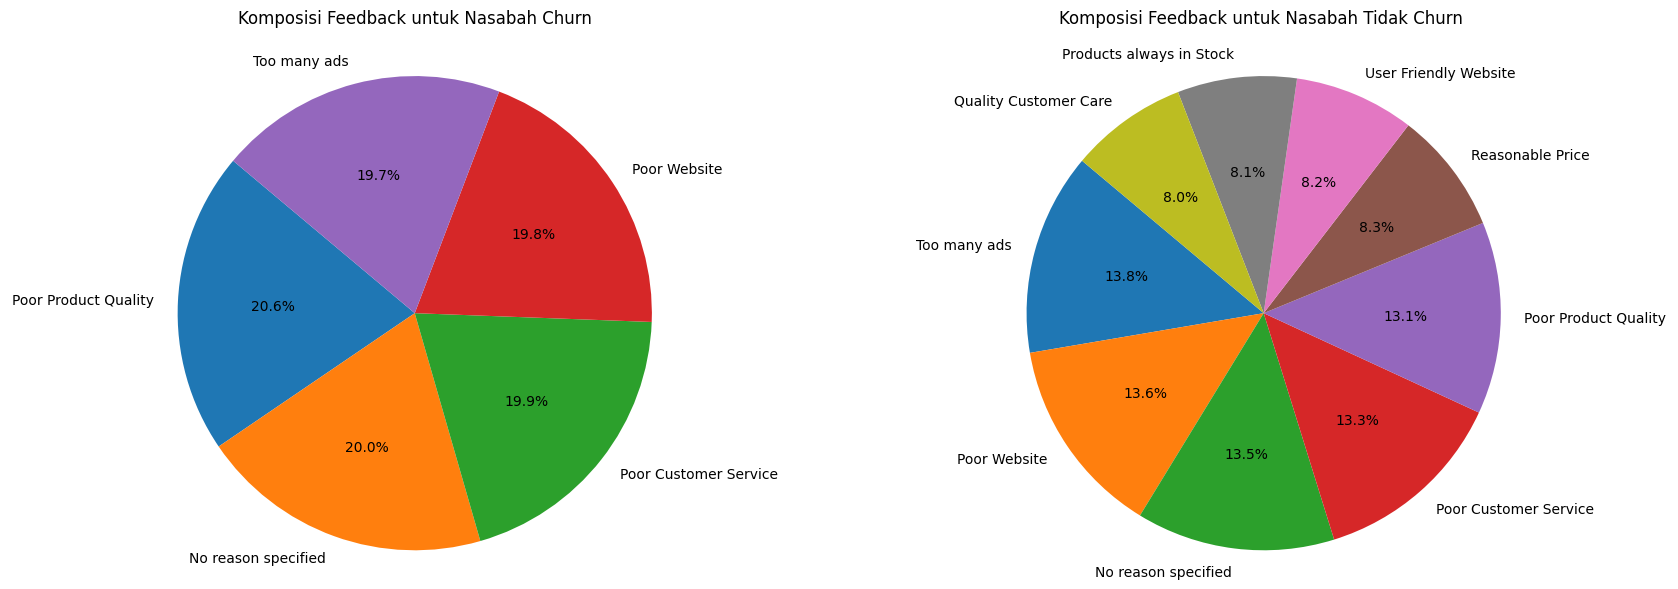

In [41]:
#membuat pie chart feedback
churn_feedback_composition = df_eda[df_eda['churn_status'] == 'churn']['feedback'].value_counts(normalize=True) * 100
not_churn_feedback_composition = df_eda[df_eda['churn_status'] == 'not_churn']['feedback'].value_counts(normalize=True) * 100

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.pie(churn_feedback_composition, labels=churn_feedback_composition.index, autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Feedback untuk Nasabah Churn\n')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(not_churn_feedback_composition, labels=not_churn_feedback_composition.index, autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Feedback untuk Nasabah Tidak Churn \n')
plt.axis('equal')

plt.tight_layout()
plt.show()

Pada dataset ini ditemukan bahwa pada customer churn memiliki feedback yang seimbang dari kelima feedback negatif. Sedangkan untuk customer yang tidak churn memiliki feedback yang seimbang di 13% untuk feedback buruk, dan 8& di feedback positif

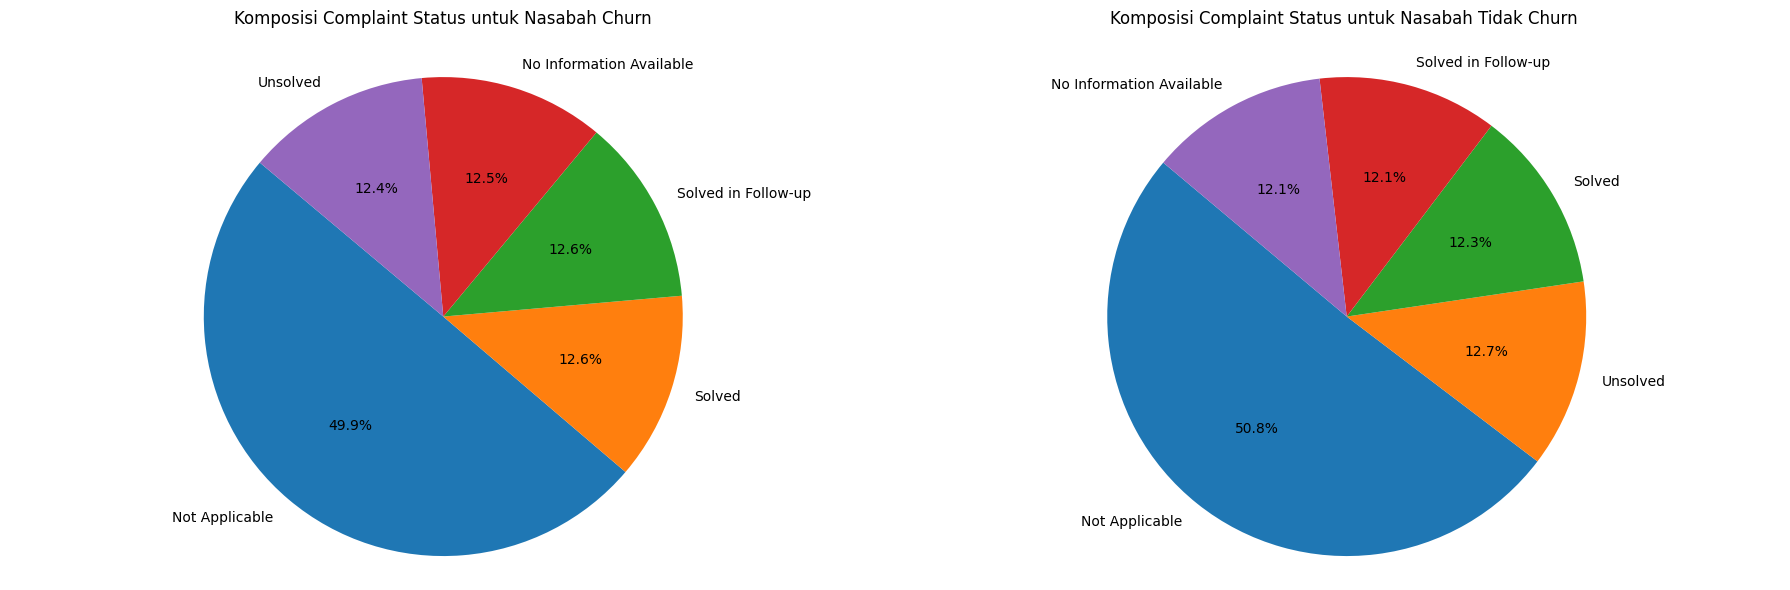

In [42]:
#membuat pie chart complaint_status
churn_complaint_status_composition = df_eda[df_eda['churn_status'] == 'churn']['complaint_status'].value_counts(normalize=True) * 100
not_churn_complaint_status_composition = df_eda[df_eda['churn_status'] == 'not_churn']['complaint_status'].value_counts(normalize=True) * 100

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.pie(churn_complaint_status_composition, labels=churn_complaint_status_composition.index, autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Complaint Status untuk Nasabah Churn\n')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(not_churn_complaint_status_composition, labels=not_churn_complaint_status_composition.index, autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Complaint Status untuk Nasabah Tidak Churn \n')
plt.axis('equal')

plt.tight_layout()
plt.show()

Pada plot pie chart di atas, terlihat bahwa karakter nasabah yang churn dan tidak churn memiliki complaint yang sama, di mana didominasi dengan complaint Not_Applicable

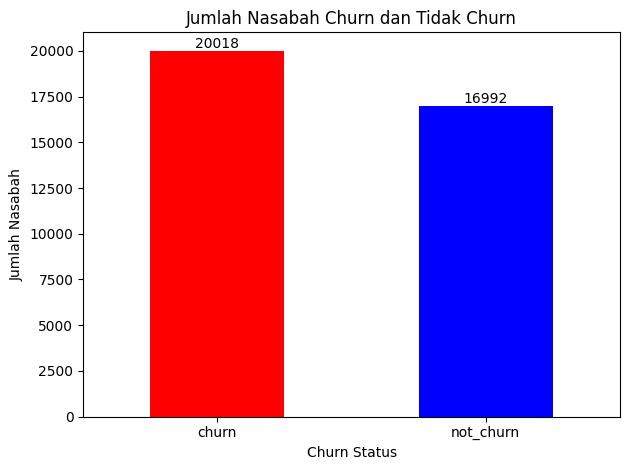

In [43]:
#melihat bar chart untuk kolom target
df_eda['churn_status'].value_counts().plot(kind='bar',color=['red', 'blue'])
plt.xlabel('Churn Status')
plt.ylabel('Jumlah Nasabah')
plt.title('Jumlah Nasabah Churn dan Tidak Churn')
plt.xticks(rotation=0)
plt.tight_layout()

for i, value in enumerate(df_eda['churn_status'].value_counts()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

Pada dataset ini, terlihat bahwa customer yang churn dan not_churn memiliki jumlah yang tidak seimbang

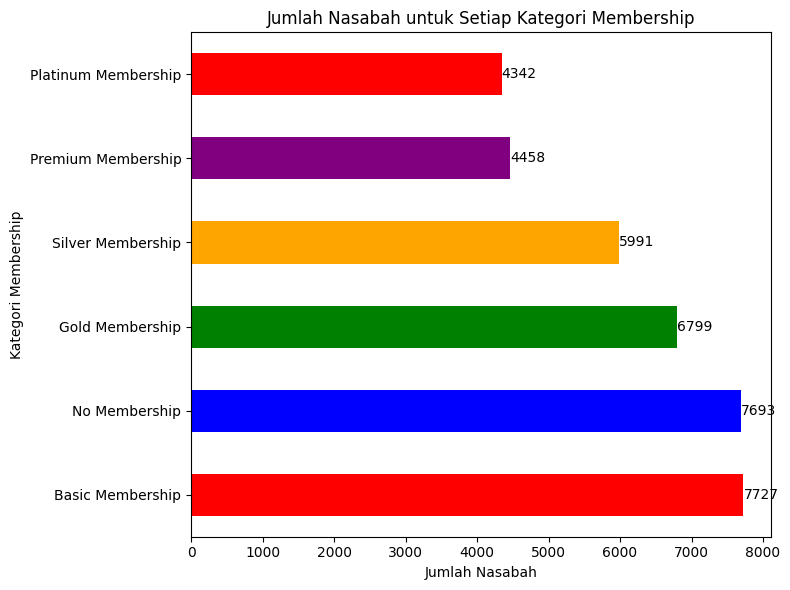

In [44]:
#membuat plot bar horizontal untuk setiap kategori membership nasabah
plt.figure(figsize=(8, 6))
df_eda['membership_category'].value_counts().plot(kind='barh', color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('Jumlah Nasabah')
plt.ylabel('Kategori Membership')
plt.title('Jumlah Nasabah untuk Setiap Kategori Membership')
plt.tight_layout()

for i, value in enumerate(df_eda['membership_category'].value_counts()):
    plt.text(value, i, str(value), ha='left', va='center')

plt.show()

In [45]:
#melihat nama-nama kolom
df_eda.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'churn_status', 'hour', 'minute',
       'second', 'year', 'month', 'date'],
      dtype='object')

##Numeric Feature

In [46]:
#membuat fungsi untuk plot histogram
def plothis(a, b):
  fig, ax = plt.subplots(1, 2, figsize=(12,6))
  for i, j in enumerate([f'{a}', f'{b}']):
    a = df_eda[f'{j}']
    ax[i].hist(a, bins=10, alpha=0.6, color='red', label='age')
    ax[i].set_xlabel(f'{j}')
    ax[i].set_ylabel('Frekuensi')
    ax[i].set_title(f'Sebaran data price skewness : {a.skew()}')
    ax[i].text(0.68, 0.25, f'price Mean: {a.mean():.2f}', color='blue', transform=ax[i].transAxes)
    ax[i].text(0.68, 0.3, f'price Median: {a.median()}', color='green', transform=ax[i].transAxes)
    ax[i].axvline(a.mean(), color='blue', linestyle='--', linewidth=1.5, label='price Mean')
    ax[i].axvline(a.median(), color='green', linestyle='-', linewidth=1.5, label='price Median')
    ax[i].legend()

In [47]:
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

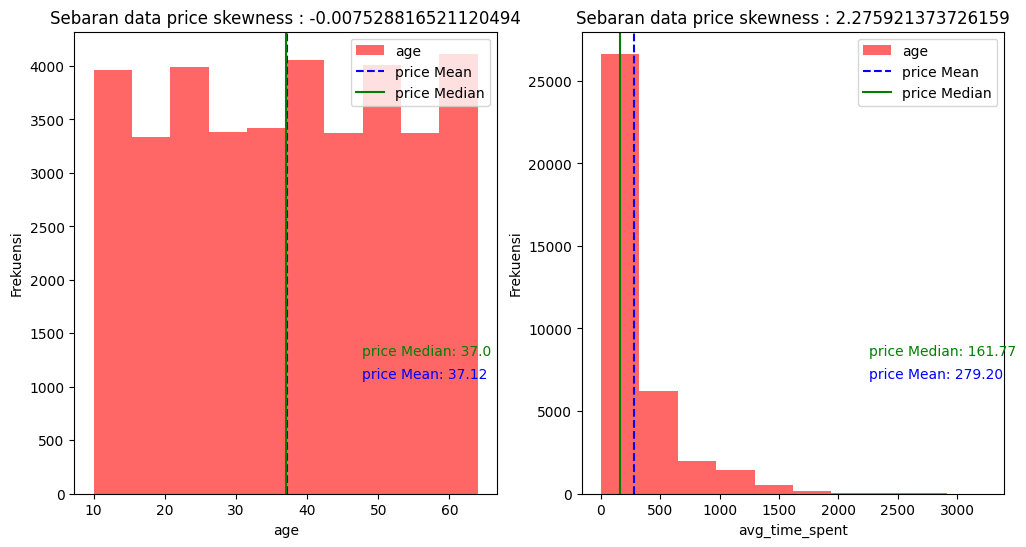

In [48]:
plothis('age', 'avg_time_spent')

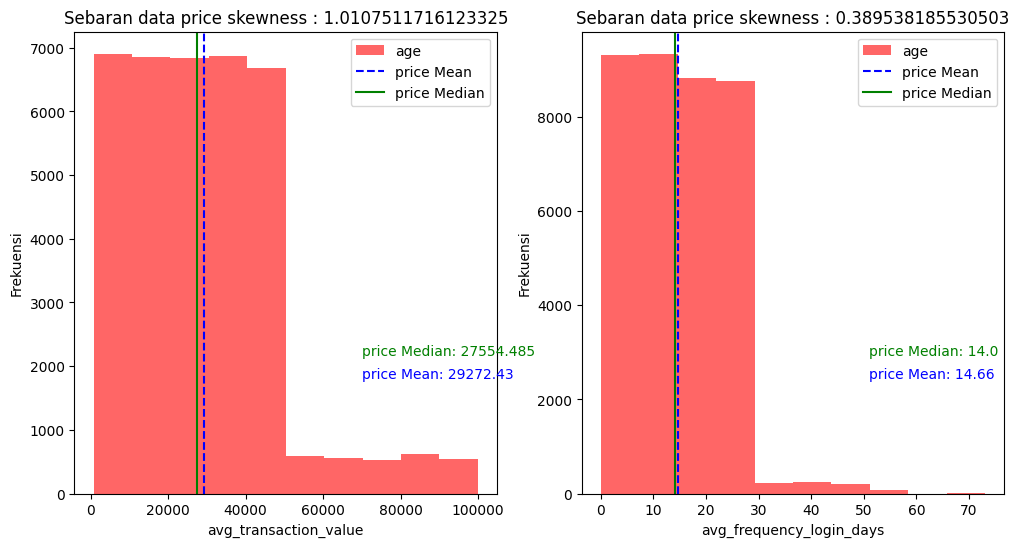

In [49]:
plothis('avg_transaction_value', 'avg_frequency_login_days')

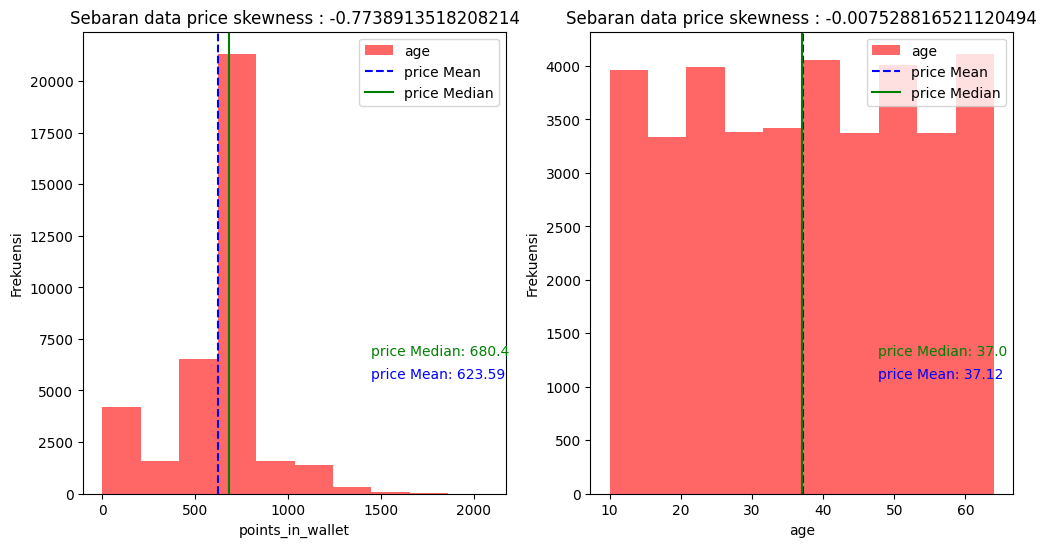

In [50]:
plothis('points_in_wallet', 'age')

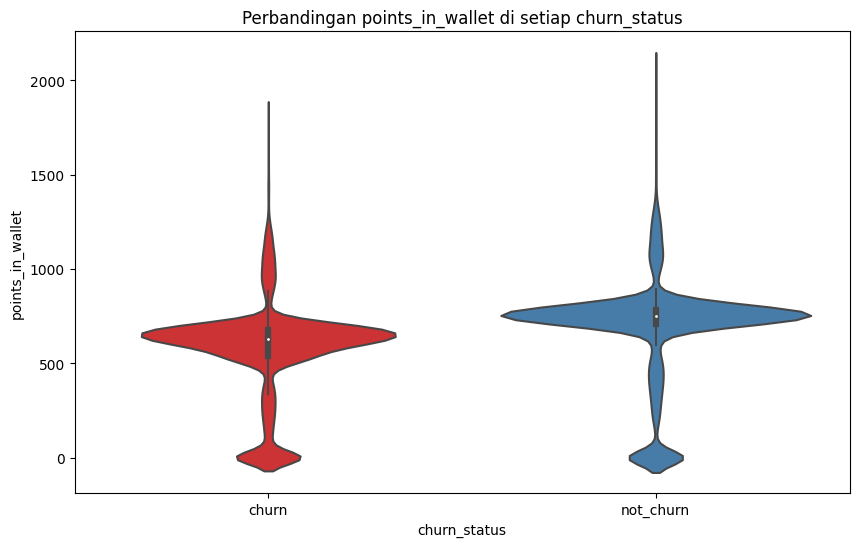

In [51]:
#membuat violin plot points_in_wallet
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_eda, x='churn_status', y='points_in_wallet', palette='Set1')
plt.title('Perbandingan points_in_wallet di setiap churn_status')
plt.xlabel('churn_status')
plt.ylabel('points_in_wallet')
plt.show()

Pada plot di atas, dapat dilihat bahwa sebaran data customer yang churn dan tidak churn memiliki pusat data yang berbeda

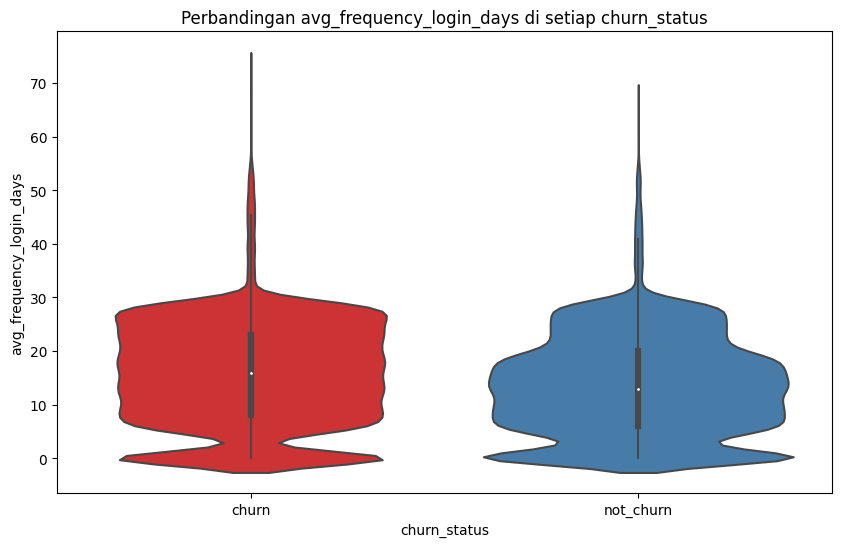

In [52]:
#membuat violin plot avg_frequency_login_days
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_eda, x='churn_status', y='avg_frequency_login_days', palette='Set1')
plt.title('Perbandingan avg_frequency_login_days di setiap churn_status')
plt.xlabel('churn_status')
plt.ylabel('avg_frequency_login_days')
plt.show()

Pada plot di atas, dapat dilihat bahwa sebaran data customer yang churn dan tidak churn memiliki pusat data yang berbeda, dan memiliki jumlah data yang sama

Secara keseluruhan, hal-hal yang saya lakukan pada section EDA adalah sebagai berikut:
* Mengubah nilai kolom 0 dan 1 di churn_risk_score menjadi churn dan not_churn untuk kebutuhan analisa
* Mengambil nilai tahun, bulan, dan tanggal dari kolom joining_date dan dimasukkan ke dalam kolom baru dengan tipe data object
* Mengambil nilai jam, menit, dan detik dari kolom last_visit_time dan dimasukkan ke dalam kolom baru dengan tipe data object

#Feature Engineering

Pada section ini, saya melakukan eksplorasi yang berfokus untuk melakukan treatment pada dataset numerikal dan kategorikal sebelum dilakukan feature selection, preprocesing, modelling, dan juga melakukan undersampling berdasarkan kolom target

In [53]:
#membuat fungsi pengecekan outliers
def normal(df, col, fold):
    for i in col:
      upper = df_eda[i].mean() + (fold * df[i].std())
      lower = df[i].mean() - (fold * df[i].std())

      outlier = df[(df[i] <= lower) | (df[i] >= upper)]

      print(f'{i}')
      print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

def skew(df, col, fold):
    for i in col:
      Q1 = df[i].quantile(.25)
      Q3 = df[i].quantile(.75)

      IQR = Q3 - Q1

      upper = Q3 + (fold * IQR)
      lower = Q1 - (fold * IQR)

      outlier = df[(df[i] <= lower) | (df[i] >= upper)]

      print(f'{i}')
      print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
      print('upper: ', upper)
      print('lower: ', lower)

In [54]:
#melihat informasi dataset
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        37010 non-null  object 
 3   region_category               37010 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       37010 non-null  object 
 7   preferred_offer_types         37010 non-null  object 
 8   medium_of_operation           37010 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [55]:
#menghapus kolom yang tidak diperlukan
df_fe = df_eda.drop(['user_id', 'joining_date', 'last_visit_time', 'days_since_last_login', 'churn_status'], axis=1)

##Get Data for Inference

In [56]:
#menyimpan 10 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df_fe.sample(10, random_state=1)

In [57]:
data_inf

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_time_spent,avg_transaction_value,...,past_complaint,complaint_status,feedback,churn_risk_score,hour,minute,second,year,month,date
24473,53,M,Town,Premium Membership,No,Without Offers,Smartphone,Mobile_Data,33.36,95320.41,...,Yes,Solved,Reasonable Price,0,19,7,39,2016,5,16
29216,24,F,City,Gold Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,679.89,16057.00,...,Yes,Unsolved,Poor Customer Service,0,17,36,40,2015,2,13
15574,53,M,Village,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,166.99,31669.84,...,No,Not Applicable,No reason specified,0,18,11,20,2016,8,24
15329,29,F,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,925.89,20407.74,...,Yes,Unsolved,Too many ads,0,15,58,31,2016,7,5
3257,44,F,Village,Silver Membership,No,Credit/Debit Card Offers,Desktop,Mobile_Data,57.03,49619.17,...,Yes,Solved in Follow-up,Poor Website,0,15,5,10,2015,9,14
5867,53,M,City,Basic Membership,No,Without Offers,Desktop,Wi-Fi,0.00,41186.95,...,No,Not Applicable,Poor Website,1,3,18,32,2016,10,18
9650,50,M,Village,Silver Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,32.40,44354.56,...,No,Not Applicable,Poor Website,1,0,59,12,2016,8,17
20054,56,F,Town,No Membership,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,34.05,26019.14,...,Yes,Solved,No reason specified,1,15,47,49,2017,10,22
2562,56,M,City,No Membership,No,Without Offers,Desktop,Wi-Fi,73.01,18798.84,...,No,Not Applicable,Poor Customer Service,1,18,3,36,2017,7,13
24905,14,M,Town,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,91.52,1684.10,...,No,Not Applicable,Poor Customer Service,1,20,57,59,2016,5,3


In [58]:
#menghapus data inference dari df_eda
df_fe.drop(data_inf.index, inplace=True)

In [59]:
#melakukan reset index untuk data inference dan df_eda
df_fe.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [60]:
#print shape setiap dataframe
print(f'df_fe shape: {df_fe.shape}')
print(f'data_inf shape: {data_inf.shape}')

df_fe shape: (37000, 24)
data_inf shape: (10, 24)


##Undersampling

Pada dataset ini, terlihat bahwa kolom target yaitu churn_risk_score memiliki imbalance proportion data, sehingga saya melakukan balancing untuk mendapat model yang dapat menghasilkan hasil klasifikasi yang objektif dan relieable

In [61]:
df_eda

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,complaint_status,feedback,churn_risk_score,churn_status,hour,minute,second,year,month,date
0,9f420209e7d129f3,29,F,Town,No Membership,2017-04-05,Yes,Without Offers,Desktop,Wi-Fi,...,No Information Available,Poor Website,1,churn,22,29,49,2017,4,5
1,ac6e97806267549e,50,M,Town,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,No Information Available,Poor Customer Service,1,churn,15,44,56,2017,3,31
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,No Information Available,Too many ads,0,not_churn,20,31,53,2017,2,11
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Too many ads,1,churn,14,28,5,2015,12,23
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Not Applicable,Poor Product Quality,0,not_churn,4,16,48,2015,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,User Friendly Website,0,not_churn,9,32,50,2015,3,5
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,Not Applicable,Reasonable Price,0,not_churn,2,28,52,2017,1,15
37007,9329a6297407334a,20,M,Town,Gold Membership,2015-07-11,Yes,Without Offers,Desktop,Mobile_Data,...,Solved,Poor Customer Service,0,not_churn,17,50,38,2015,7,11
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,Not Applicable,Poor Website,0,not_churn,17,7,57,2016,5,25


In [62]:
#melakukan undersampling
df_0 = df_eda[df_eda['churn_risk_score'] == 0]
df_1 = df_eda[df_eda['churn_risk_score']==1]
df_1 = df_1.sample(len(df_0))
df_fe = pd.concat([df_0,df_1])
df_fe = df_fe.sample(len(df_fe)).reset_index(drop=True)
df_fe

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,complaint_status,feedback,churn_risk_score,churn_status,hour,minute,second,year,month,date
0,a4d8c516e812819f,44,F,City,Premium Membership,2017-04-03,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,No Information Available,Poor Product Quality,0,not_churn,13,1,34,2017,4,3
1,8589b555e1343a7c,11,F,Town,Silver Membership,2017-03-28,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Poor Product Quality,0,not_churn,8,29,4,2017,3,28
2,825c60fe18247802,45,M,Town,Silver Membership,2015-04-25,No,Without Offers,Smartphone,Wi-Fi,...,Not Applicable,Poor Customer Service,0,not_churn,10,32,19,2015,4,25
3,8d1ea064784569a7,41,F,Town,No Membership,2017-05-12,Yes,Without Offers,Both,Mobile_Data,...,Not Applicable,Poor Website,1,churn,20,45,30,2017,5,12
4,a5f33b1b9382b431,53,M,Town,Basic Membership,2017-12-29,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Poor Customer Service,1,churn,13,13,33,2017,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,a1a38fd1f9c324ec,24,F,Town,Basic Membership,2016-12-04,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Solved in Follow-up,Poor Customer Service,1,churn,7,36,45,2016,12,4
33980,a6731efb7244d75d,35,M,Town,Gold Membership,2017-04-04,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Unsolved,User Friendly Website,0,not_churn,14,11,22,2017,4,4
33981,a23851d30d400ba1,28,M,City,Premium Membership,2017-07-08,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Not Applicable,Reasonable Price,0,not_churn,13,49,59,2017,7,8
33982,83899702a6ad3d99,20,M,City,Gold Membership,2017-05-04,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Too many ads,1,churn,21,5,17,2017,5,4


<Axes: >

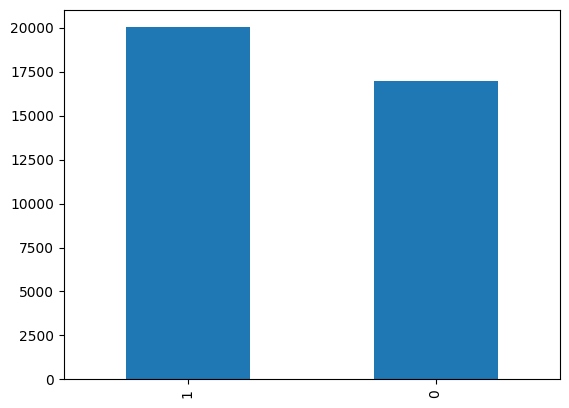

In [63]:
#memplot bar nilai kategori target sebelum di-undersampling
df_eda['churn_risk_score'].value_counts().plot(kind='bar')

<Axes: >

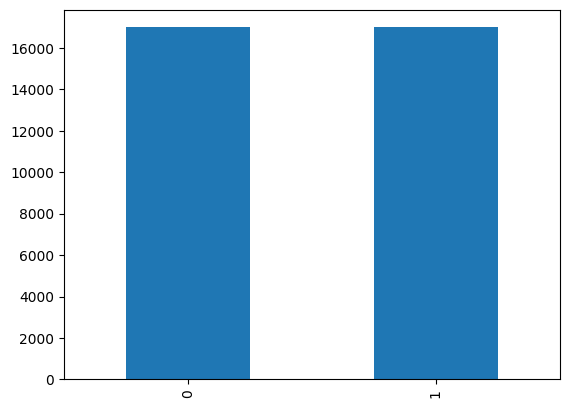

In [64]:
#memplot bar nilai kategori target setelah di-undersampling
df_fe['churn_risk_score'].value_counts().plot(kind='bar')

In [65]:
#melihat shape dataframe sebelum dan setelah undersampling
print(df_eda.shape)
print(df_fe.shape)

(37010, 29)
(33984, 29)


##Split Dataset

Pada section ini saya melakukan splitting dataset menjadi train, validation, dan test

In [66]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       33984 non-null  object 
 1   age                           33984 non-null  int64  
 2   gender                        33984 non-null  object 
 3   region_category               33984 non-null  object 
 4   membership_category           33984 non-null  object 
 5   joining_date                  33984 non-null  object 
 6   joined_through_referral       33984 non-null  object 
 7   preferred_offer_types         33984 non-null  object 
 8   medium_of_operation           33984 non-null  object 
 9   internet_option               33984 non-null  object 
 10  last_visit_time               33984 non-null  object 
 11  days_since_last_login         33984 non-null  int64  
 12  avg_time_spent                33984 non-null  float64
 13  a

In [67]:
df_fe.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,hour,minute,second,year,month,date
count,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000
mean,37.160105,13.525659,279.790029,29652.217660,14.584316,628.237785,0.500000,11.533575,29.676348,29.580008,2016.006738,6.531191,15.674935
std,15.886067,6.298123,330.099789,19805.324072,9.459079,270.558133,0.500007,6.926550,17.296771,17.422956,0.819772,3.451042,8.793223
min,10.000000,1.000000,0.000000,800.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,23.000000,9.000000,60.495000,14311.717500,7.000000,580.227500,0.000000,6.000000,15.000000,14.000000,2015.000000,4.000000,8.000000
50%,37.000000,13.000000,162.290000,27877.710000,14.000000,689.865000,0.500000,12.000000,30.000000,30.000000,2016.000000,7.000000,16.000000
75%,51.000000,18.000000,357.855000,41197.202500,22.000000,760.900000,1.000000,18.000000,45.000000,45.000000,2017.000000,10.000000,23.000000
max,64.000000,27.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,23.000000,59.000000,59.000000,2017.000000,12.000000,31.000000


In [68]:
#melihat jumlah banyak kolom df_fe
len(df_fe.columns)

29

In [69]:
num_col = ['age',	'avg_time_spent',	'avg_transaction_value',	'avg_frequency_login_days',	'points_in_wallet']
cat_col = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
           'internet_option', 'used_special_discount', 'offer_application_preference','past_complaint', 'complaint_status', 'feedback',
           'hour', 'minute', 'second', 'year', 'month', 'date']

In [70]:
#melihat jumlah nilai unik kolom membership_category
df_fe.membership_category.value_counts()

No Membership          6592
Basic Membership       6551
Gold Membership        6423
Silver Membership      5618
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64

In [71]:
#melakukan split dataset train dan test
X = df_fe.drop('churn_risk_score', axis=1)
y = df_fe['churn_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=1)

In [72]:
#melihat shape dataframe
print(f'df_fe: {df_fe.shape}')
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

df_fe: (33984, 29)
X shape: (33984, 28)
y shape: (33984,)
X_train shape: (21749, 28)
y_train shape: (21749,)
X_test shape: (6797, 28)
y_test shape: (6797,)
X_val shape: (5438, 28)
y_val shape: (5438,)


##Numerical Feature

In [73]:
#melihat dataset kolom numerikal
df_fe[num_col]

,age,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,44,318.780000,17931.47,13.0,766.610000
1,11,233.790000,32300.92,25.0,716.580000
2,45,291.700000,18911.05,18.0,700.090000
3,41,230.740000,19495.56,18.0,587.350000
4,53,391.560000,8232.10,9.0,245.685317
...,...,...,...,...,...
33979,24,156.040000,22377.21,6.0,0.000000
33980,35,388.040000,17370.05,0.0,421.134565
33981,28,53.080000,67691.79,9.0,439.778478
33982,20,1017.714745,21682.78,28.0,306.883139


###Outliers

In [74]:
#membuat fungsi pengecekan outliers
def normal(df, col, fold):
    for i in col:
      upper = df[i].mean() + (fold * df[i].std())
      lower = df[i].mean() - (fold * df[i].std())

      outlier = df[(df[i] <= lower) | (df[i] >= upper)]

      print(f'{i}')
      print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

def skew(df, col, fold):
    for i in col:
      Q1 = df[i].quantile(.25)
      Q3 = df[i].quantile(.75)

      IQR = Q3 - Q1

      upper = Q3 + (fold * IQR)
      lower = Q1 - (fold * IQR)

      outlier = df[(df[i] <= lower) | (df[i] >= upper)]

      print(f'{i}')
      print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
      print('upper: ', upper)
      print('lower: ', lower)

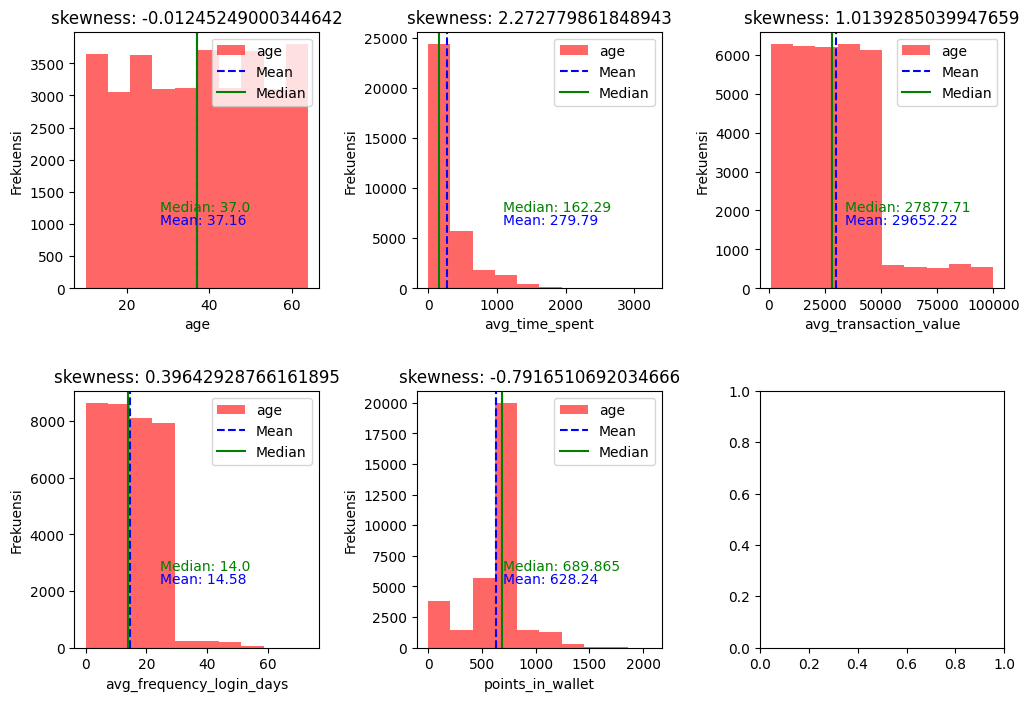

In [75]:
#plot histogram kolom-kolom numerikal
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

for i, j in enumerate(num_col):
    a = df_fe[f'{j}']
    row = i // 3
    col = i % 3

    ax[row, col].hist(a, bins=10, alpha=0.6, color='red', label='age')
    ax[row, col].set_xlabel(f'{j}')
    ax[row, col].set_ylabel('Frekuensi')
    ax[row, col].set_title(f'skewness: {a.skew()}')
    ax[row, col].text(0.35, 0.25, f'Mean: {a.mean():.2f}', color='blue', transform=ax[row, col].transAxes)
    ax[row, col].text(0.35, 0.3, f'Median: {a.median()}', color='green', transform=ax[row, col].transAxes)
    ax[row, col].axvline(a.mean(), color='blue', linestyle='--', linewidth=1.5, label='Mean')
    ax[row, col].axvline(a.median(), color='green', linestyle='-', linewidth=1.5, label='Median')
    ax[row, col].legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [76]:
num_col

['age',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [77]:
#membuat variabel berisi list nama kolom numerik distribusi normal dan skew
gauss = ['avg_frequency_login_days', 'age']
iqr = ['avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

In [78]:
#menggunakan fungsi pemeriksaan outliers distribusi normal
normal(df_fe, gauss, 3)

avg_frequency_login_days
percentage:  0.8239171374764594 %
age
percentage:  0.0 %


In [79]:
#menggunakan fungsi pemeriksaan outliers distribusi skew
skew(df_fe, iqr, 3)

avg_time_spent
percentage:  2.3363935969868175 %
upper:  1249.935
lower:  -831.585
avg_transaction_value
percentage:  0.0 %
upper:  121853.6575
lower:  -66344.7375
points_in_wallet
percentage:  10.284251412429377 %
upper:  1302.9175
lower:  38.20999999999992


In [80]:
#melakukan capping outliers untuk kolom numerik terpilih (normal dist.)
wins_gauss = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=gauss)

df_fe[gauss] = wins_gauss.fit_transform(df_fe[gauss])

In [81]:
#melakukan capping outliers untuk kolom numerik terpilih (skew dist.)
wins_iqr = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=iqr)

df_fe[iqr] = wins_iqr.fit_transform(df_fe[iqr])

In [82]:
#melihat central tendency data sebelum handle outliers
print(df_eda[num_col].describe())
print('-'*60)
print(df_fe[num_col].describe())

                age  avg_time_spent  avg_transaction_value  \
count  37010.000000    37010.000000           37010.000000   
mean      37.120697      279.201356           29272.430216   
std       15.866834      330.017336           19445.963492   
min       10.000000        0.000000             800.460000   
25%       23.000000       60.122500           14177.835000   
50%       37.000000      161.770000           27554.485000   
75%       51.000000      356.525000           40858.672500   
max       64.000000     3235.578521           99914.050000   

       avg_frequency_login_days  points_in_wallet  
count              37010.000000      37010.000000  
mean                  14.659540        623.590885  
std                    9.478756        270.218956  
min                    0.000000          0.000000  
25%                    7.000000        574.220000  
50%                   14.000000        680.400000  
75%                   22.000000        756.990000  
max                   73.

###Scalling

In [83]:
#melakukan scalling pada kolom numerik gauss dengan MinMax Scaller
minmax_scl = MinMaxScaler()
df_fe[gauss] = minmax_scl.fit_transform(df_fe[gauss])

In [84]:
#melakukan scalling pada kolom numerik iqr dengan Robust Scaller
robust_scl = RobustScaler()
df_fe[iqr] = robust_scl.fit_transform(df_fe[iqr])

Pada kasus ini saya memilih Robust Scaller karena terdapat skew yang sangat ekstrem dengan outliers yang tinggi. Hal ini karena Robust Scaller lebih efektif karena akan melakukan pengskalaan yang lebih tahan dengan outliers yang ekstrem

In [85]:
df_fe

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,complaint_status,feedback,churn_risk_score,churn_status,hour,minute,second,year,month,date
0,a4d8c516e812819f,0.629630,F,City,Premium Membership,2017-04-03,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,No Information Available,Poor Product Quality,0,not_churn,13,1,34,2017,4,3
1,8589b555e1343a7c,0.018519,F,Town,Silver Membership,2017-03-28,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Poor Product Quality,0,not_churn,8,29,4,2017,3,28
2,825c60fe18247802,0.648148,M,Town,Silver Membership,2015-04-25,No,Without Offers,Smartphone,Wi-Fi,...,Not Applicable,Poor Customer Service,0,not_churn,10,32,19,2015,4,25
3,8d1ea064784569a7,0.574074,F,Town,No Membership,2017-05-12,Yes,Without Offers,Both,Mobile_Data,...,Not Applicable,Poor Website,1,churn,20,45,30,2017,5,12
4,a5f33b1b9382b431,0.796296,M,Town,Basic Membership,2017-12-29,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Poor Customer Service,1,churn,13,13,33,2017,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,a1a38fd1f9c324ec,0.259259,F,Town,Basic Membership,2016-12-04,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Solved in Follow-up,Poor Customer Service,1,churn,7,36,45,2016,12,4
33980,a6731efb7244d75d,0.462963,M,Town,Gold Membership,2017-04-04,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Unsolved,User Friendly Website,0,not_churn,14,11,22,2017,4,4
33981,a23851d30d400ba1,0.333333,M,City,Premium Membership,2017-07-08,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,Not Applicable,Reasonable Price,0,not_churn,13,49,59,2017,7,8
33982,83899702a6ad3d99,0.185185,M,City,Gold Membership,2017-05-04,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,Not Applicable,Too many ads,1,churn,21,5,17,2017,5,4


##Categoric Feature

In [86]:
#melihat dataframe kolom kategorik
df_fe[cat_col]

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,hour,minute,second,year,month,date
0,F,City,Premium Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,Yes,No,Yes,No Information Available,Poor Product Quality,13,1,34,2017,4,3
1,F,Town,Silver Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,No,Yes,No,Not Applicable,Poor Product Quality,8,29,4,2017,3,28
2,M,Town,Silver Membership,No,Without Offers,Smartphone,Wi-Fi,No,Yes,No,Not Applicable,Poor Customer Service,10,32,19,2015,4,25
3,F,Town,No Membership,Yes,Without Offers,Both,Mobile_Data,Yes,No,No,Not Applicable,Poor Website,20,45,30,2017,5,12
4,M,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Customer Service,13,13,33,2017,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,7,36,45,2016,12,4
33980,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,No,Yes,Unsolved,User Friendly Website,14,11,22,2017,4,4
33981,M,City,Premium Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Reasonable Price,13,49,59,2017,7,8
33982,M,City,Gold Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,No,Yes,No,Not Applicable,Too many ads,21,5,17,2017,5,4


In [87]:
#melihat jumlah kemunculan unik value setiap kolom kategorikal
for i in cat_col:
  print(i)
  print(df_fe[f'{i}'].value_counts().sort_index())
  print('-'*30)

gender
F    17014
M    16970
Name: gender, dtype: int64
------------------------------
region_category
City       11657
Town       17960
Village     4367
Name: region_category, dtype: int64
------------------------------
membership_category
Basic Membership       6551
Gold Membership        6423
No Membership          6592
Platinum Membership    4342
Premium Membership     4458
Silver Membership      5618
Name: membership_category, dtype: int64
------------------------------
joined_through_referral
No     19615
Yes    14369
Name: joined_through_referral, dtype: int64
------------------------------
preferred_offer_types
Credit/Debit Card Offers    11291
Gift Vouchers/Coupons       11663
Without Offers              11030
Name: preferred_offer_types, dtype: int64
------------------------------
medium_of_operation
Both           3527
Desktop       17696
Smartphone    12761
Name: medium_of_operation, dtype: int64
------------------------------
internet_option
Fiber_Optic    11225
Mobile_Dat

###Encoder

In [88]:
cat_col

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'hour',
 'minute',
 'second',
 'year',
 'month',
 'date']

In [89]:
#melihat jumlah list kolom kategorik
len(cat_col)

18

In [90]:
#memisahkan kolom ordinal encoder dan one hot encoder
ohe_list = ['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status', 'feedback']
ord_list = ['gender', 'joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint']

In [91]:
#melakukan one hot encoder untuk kolom kategori 'relationship', 'native_country_2', 'marital_status_2', 'occupation_2', 'workclass_2'
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_fe[ohe_list]))
cat_ohe.columns = ohe_enc.get_feature_names_out()

review = pd.concat([df_fe[ohe_list].reset_index(drop=True), cat_ohe], axis=1)
review


,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,region_category_City,region_category_Town,region_category_Village,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,City,Premium Membership,Credit/Debit Card Offers,Desktop,Wi-Fi,No Information Available,Poor Product Quality,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Town,Silver Membership,Credit/Debit Card Offers,Desktop,Fiber_Optic,Not Applicable,Poor Product Quality,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Town,Silver Membership,Without Offers,Smartphone,Wi-Fi,Not Applicable,Poor Customer Service,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Town,No Membership,Without Offers,Both,Mobile_Data,Not Applicable,Poor Website,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Town,Basic Membership,Credit/Debit Card Offers,Desktop,Fiber_Optic,Not Applicable,Poor Customer Service,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,Town,Basic Membership,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Solved in Follow-up,Poor Customer Service,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33980,Town,Gold Membership,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Unsolved,User Friendly Website,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33981,City,Premium Membership,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Not Applicable,Reasonable Price,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33982,City,Gold Membership,Credit/Debit Card Offers,Desktop,Fiber_Optic,Not Applicable,Too many ads,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
cat_ohe

,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Credit/Debit Card Offers,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33980,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33982,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
ord_list

['gender',
 'joined_through_referral',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint']

In [94]:
#melihat nilai unik kolom ord_list
for i in ord_list:
  print(i)
  print(df_fe[f'{i}'].value_counts())

gender
F    17014
M    16970
Name: gender, dtype: int64
joined_through_referral
No     19615
Yes    14369
Name: joined_through_referral, dtype: int64
used_special_discount
Yes    18712
No     15272
Name: used_special_discount, dtype: int64
offer_application_preference
Yes    18808
No     15176
Name: offer_application_preference, dtype: int64
past_complaint
No     17102
Yes    16882
Name: past_complaint, dtype: int64


In [95]:
#melakukan one hot encoder
#define urutan
gender = ['F', 'M']
joined_through_referral = ['No', 'Yes']
used_special_discount = ['No', 'Yes']
offer_application_preference = ['No', 'Yes']
past_complaint = ['No', 'Yes']


# melakukan ordinal encoder - convert ke dataframe
ord_enc = OrdinalEncoder(categories=[gender, joined_through_referral, used_special_discount, offer_application_preference, past_complaint])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_fe[ord_list]))
cat_ord.columns = ord_enc.get_feature_names_out()

review = pd.concat([df_fe[ord_list].reset_index(drop=True), cat_ord], axis=1)
review


,gender,joined_through_referral,used_special_discount,offer_application_preference,past_complaint,gender,joined_through_referral,used_special_discount,offer_application_preference,past_complaint
0,F,No,Yes,No,Yes,0.0,0.0,1.0,0.0,1.0
1,F,Yes,No,Yes,No,0.0,1.0,0.0,1.0,0.0
2,M,No,No,Yes,No,1.0,0.0,0.0,1.0,0.0
3,F,Yes,Yes,No,No,0.0,1.0,1.0,0.0,0.0
4,M,No,Yes,No,No,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
33979,F,No,Yes,No,Yes,0.0,0.0,1.0,0.0,1.0
33980,M,Yes,Yes,No,Yes,1.0,1.0,1.0,0.0,1.0
33981,M,No,Yes,No,No,1.0,0.0,1.0,0.0,0.0
33982,M,Yes,No,Yes,No,1.0,1.0,0.0,1.0,0.0


In [96]:
df_cat = pd.concat([cat_ord, cat_ohe], axis=1)

In [97]:
df_cat

,gender,joined_through_referral,used_special_discount,offer_application_preference,past_complaint,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33980,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33981,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33982,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Berdasarkan seluruh kolom kategori di atas, metode encoder yang akan saya lakukan adalah sebagai berikut:

* Untuk kolom education dan sex akan digunakan metode Ordinal Encoder, karena memiliki unsur urutan bertingkat.
* Untuk kolom  relationship, native_country_2, marital_status_2, occupation_2, race, dan workclass_2 akan digunakan One Hot Encoder, karena memiliki kategorikal yang tidak ada urutan

##Feature Selection

In [98]:
df_fe.T

,0,1,2,3,4,5,6,7,8,9,...,33974,33975,33976,33977,33978,33979,33980,33981,33982,33983
user_id,a4d8c516e812819f,8589b555e1343a7c,825c60fe18247802,8d1ea064784569a7,a5f33b1b9382b431,9465c98a764006aa,b8c3c19c233af824,b5875e9bffd0c014,aa9ee36abca97094,ada1692df17e7c09,...,89ea1a43e3765f7f,8ca4b34cf02a7edc,886a39bd7a0154c3,81b9e32c4d413c03,9c86b769a5ba5c94,a1a38fd1f9c324ec,a6731efb7244d75d,a23851d30d400ba1,83899702a6ad3d99,92d9804dd84919e1
age,0.62963,0.018519,0.648148,0.574074,0.796296,0.851852,0.481481,0.074074,0.703704,0.5,...,0.574074,0.425926,0.462963,0.740741,0.092593,0.259259,0.462963,0.333333,0.185185,0.685185
gender,F,F,M,F,M,M,M,M,M,M,...,M,M,F,F,F,F,M,M,M,F
region_category,City,Town,Town,Town,Town,Town,Town,City,City,Town,...,Town,Town,Town,City,Town,Town,Town,City,City,Town
membership_category,Premium Membership,Silver Membership,Silver Membership,No Membership,Basic Membership,Basic Membership,Basic Membership,Basic Membership,Basic Membership,Basic Membership,...,Premium Membership,Basic Membership,Premium Membership,Basic Membership,Platinum Membership,Basic Membership,Gold Membership,Premium Membership,Gold Membership,Silver Membership
joining_date,2017-04-03,2017-03-28,2015-04-25,2017-05-12,2017-12-29,2017-08-10,2017-01-02,2016-11-04,2017-10-30,2016-11-14,...,2016-04-28,2016-08-20,2015-05-06,2015-08-22,2016-08-09,2016-12-04,2017-04-04,2017-07-08,2017-05-04,2016-06-14
joined_through_referral,No,Yes,No,Yes,No,No,No,Yes,No,No,...,No,Yes,No,No,Yes,No,Yes,No,Yes,No
preferred_offer_types,Credit/Debit Card Offers,Credit/Debit Card Offers,Without Offers,Without Offers,Credit/Debit Card Offers,Without Offers,Gift Vouchers/Coupons,Without Offers,Gift Vouchers/Coupons,Without Offers,...,Gift Vouchers/Coupons,Credit/Debit Card Offers,Without Offers,Credit/Debit Card Offers,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers,Gift Vouchers/Coupons
medium_of_operation,Desktop,Desktop,Smartphone,Both,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,...,Smartphone,Desktop,Smartphone,Smartphone,Desktop,Smartphone,Smartphone,Smartphone,Desktop,Desktop
internet_option,Wi-Fi,Fiber_Optic,Wi-Fi,Mobile_Data,Fiber_Optic,Wi-Fi,Mobile_Data,Mobile_Data,Wi-Fi,Fiber_Optic,...,Fiber_Optic,Mobile_Data,Fiber_Optic,Fiber_Optic,Fiber_Optic,Wi-Fi,Wi-Fi,Wi-Fi,Fiber_Optic,Wi-Fi


In [99]:
#melihat dataframe yang berisi num_col dan target
df_fe.loc[:, num_col + ['churn_risk_score']]

,age,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,0.629630,0.526264,-0.369948,0.302599,0.424774,0
1,0.018519,0.240449,0.164520,0.581921,0.147864,0
2,0.648148,0.435196,-0.333513,0.418983,0.056594,0
3,0.574074,0.230192,-0.311772,0.418983,-0.567408,1
4,0.796296,0.771018,-0.730714,0.209492,-2.458480,1
...,...,...,...,...,...,...
33979,0.259259,-0.021018,-0.204590,0.139661,-3.606830,1
33980,0.462963,0.759181,-0.390830,0.000000,-1.487390,0
33981,0.333333,-0.367265,1.480876,0.209492,-1.384198,0
33982,0.185185,2.876731,-0.230419,0.651752,-2.119757,1


###Numerical

In [100]:
#memisahkan fitur numerik dan target
X = df_fe[num_col]
y = df_fe['churn_risk_score']


In [101]:
#menggunakan metode feature importance Random Forest untuk feature selection
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(X, y)
feature_importance = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

print(feature_importance_df.sort_values(by='Importance', ascending=False))

                    Feature  Importance
4          points_in_wallet    0.636301
2     avg_transaction_value    0.153684
1            avg_time_spent    0.087215
0                       age    0.066163
3  avg_frequency_login_days    0.056636


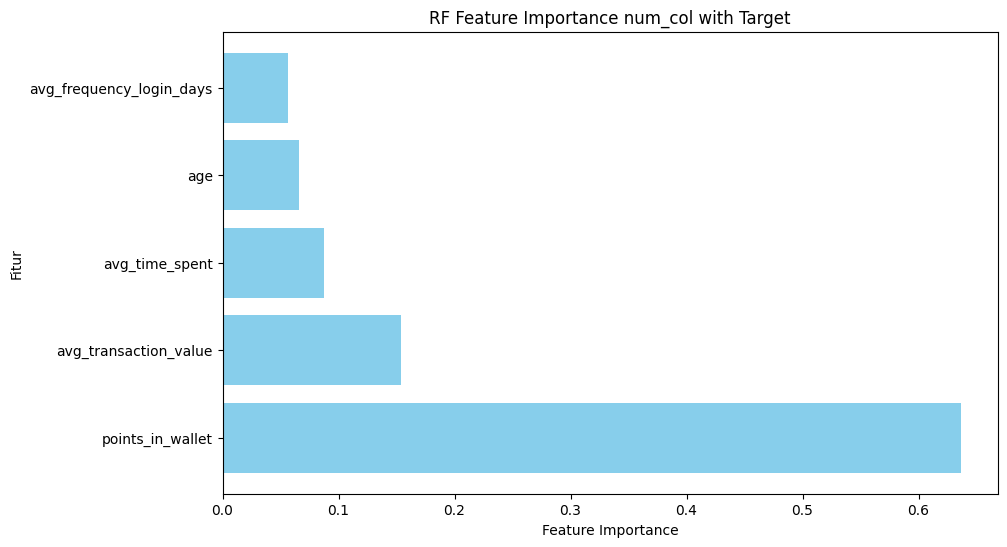

In [102]:
#plot bar hasil perhitungan korelasi
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Fitur')
plt.title('RF Feature Importance num_col with Target')
plt.show()

In [103]:
#menggunakan metode pointbiserialr untuk feature selection
correlations = {}
for column in num_col:
    correlation, p_value = pointbiserialr(df_fe[column], df_fe['churn_risk_score'])
    correlations[column] = correlation

correlation_bis = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
print(correlation_bis)

                    Feature  Correlation
0                       age     0.009238
1            avg_time_spent    -0.013359
2     avg_transaction_value    -0.213047
3  avg_frequency_login_days     0.116500
4          points_in_wallet    -0.207554


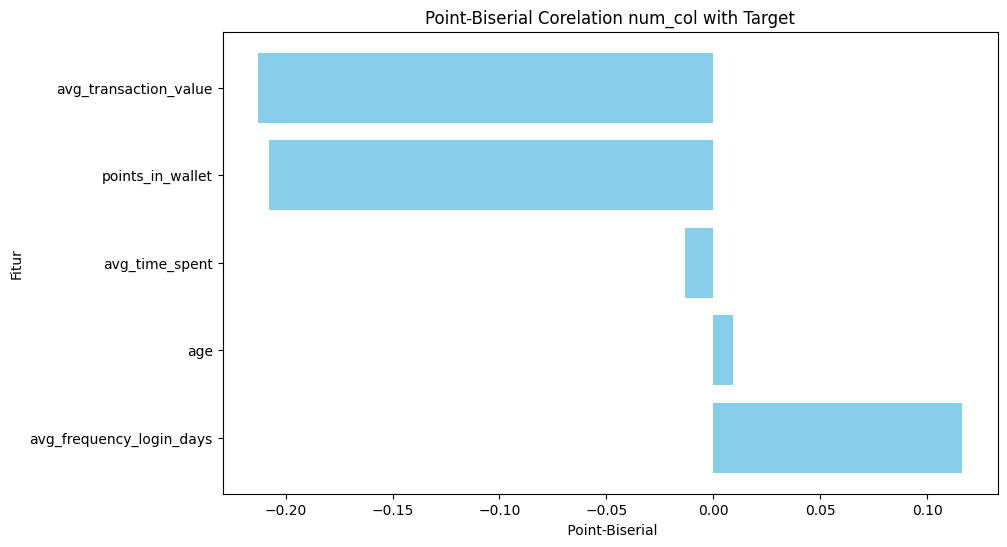

In [104]:
#plot bar hasil perhitungan korelasi
correlation_bis = correlation_bis.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(correlation_bis['Feature'], correlation_bis['Correlation'], color='skyblue')
plt.xlabel(' Point-Biserial')
plt.ylabel('Fitur')
plt.title('Point-Biserial Corelation num_col with Target')
plt.show()

In [105]:
#menggunakan metode ttest_ind untuk feature selection
group0 = df_fe[df_fe['churn_risk_score'] == 0]
group1 = df_fe[df_fe['churn_risk_score'] == 1]

p_values = {}
for col in num_col:
    t_statistic, p_value = ttest_ind(group0[col], group1[col])
    p_values[col] = p_value

p_value_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p_value'])
print(p_value_df)

                    Feature        p_value
0                       age   8.858952e-02
1            avg_time_spent   1.378936e-02
2     avg_transaction_value   0.000000e+00
3  avg_frequency_login_days  5.402769e-103
4          points_in_wallet   0.000000e+00


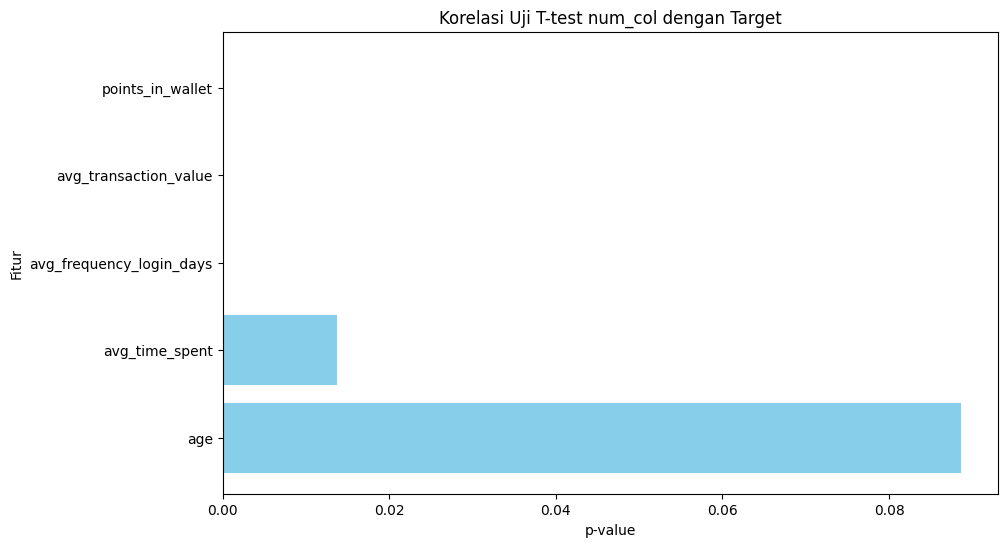

In [106]:
#plot bar hasil perhitungan korelasi
p_value_df = p_value_df.sort_values(by='p_value', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(p_value_df['Feature'], p_value_df['p_value'], color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Fitur')
plt.title('Korelasi Uji T-test num_col dengan Target')
plt.show()

In [107]:
#menggunakan fungsi selectKbest untuk melakukan feature selection dengan fungsi f_classif
k = 'all'
selector = SelectKBest(score_func=f_classif, k=k)

X_baru = selector.fit_transform(X, y)

index = selector.get_support(indices=True)
feature_scores = selector.scores_

selected_features = df_fe[num_col].columns[index].tolist()

print("Selected features:", selected_features)
print("Feature scores:", feature_scores)

Selected features: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Feature scores: [   2.89998498    6.06554261 1615.74579088  467.55633624 1529.80153918]


In [108]:
classif_df = pd.DataFrame({'Selected_features': selected_features, 'Feature_scores': feature_scores})
classif_df

,Selected_features,Feature_scores
0,age,2.899985
1,avg_time_spent,6.065543
2,avg_transaction_value,1615.745791
3,avg_frequency_login_days,467.556336
4,points_in_wallet,1529.801539


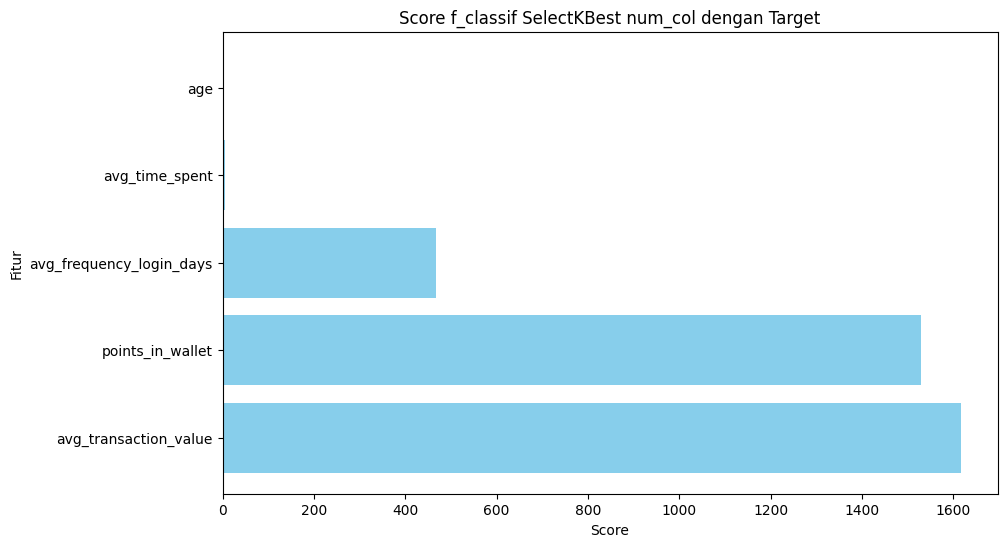

In [109]:
#plot bar hasil perhitungan korelasi
classif_df = classif_df.sort_values(by='Feature_scores', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(classif_df['Selected_features'], classif_df['Feature_scores'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Fitur')
plt.title('Score f_classif SelectKBest num_col dengan Target')
plt.show()

###Categoric

In [110]:
df_fe[cat_col]

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,hour,minute,second,year,month,date
0,F,City,Premium Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,Yes,No,Yes,No Information Available,Poor Product Quality,13,1,34,2017,4,3
1,F,Town,Silver Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,No,Yes,No,Not Applicable,Poor Product Quality,8,29,4,2017,3,28
2,M,Town,Silver Membership,No,Without Offers,Smartphone,Wi-Fi,No,Yes,No,Not Applicable,Poor Customer Service,10,32,19,2015,4,25
3,F,Town,No Membership,Yes,Without Offers,Both,Mobile_Data,Yes,No,No,Not Applicable,Poor Website,20,45,30,2017,5,12
4,M,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Customer Service,13,13,33,2017,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,7,36,45,2016,12,4
33980,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,No,Yes,Unsolved,User Friendly Website,14,11,22,2017,4,4
33981,M,City,Premium Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Reasonable Price,13,49,59,2017,7,8
33982,M,City,Gold Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,No,Yes,No,Not Applicable,Too many ads,21,5,17,2017,5,4


In [111]:
# Pisahkan fitur dan target
X = df_cat
y = df_fe['churn_risk_score']


In [112]:
#menggunakan fungsi selectKbest untuk melakukan feature selection dengan fungsi chi2
k = 'all'
selector_cat = SelectKBest(score_func=chi2, k=k)

X_baru = selector_cat.fit_transform(X, y)

index = selector_cat.get_support(indices=True)
feature_scores = selector_cat.scores_

selected_features = df_cat.columns[index].tolist()

print("Selected features:", selected_features)
print("Feature scores:", feature_scores)

Selected features: ['gender', 'joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'region_category_City', 'region_category_Town', 'region_category_Village', 'membership_category_Basic Membership', 'membership_category_Gold Membership', 'membership_category_No Membership', 'membership_category_Platinum Membership', 'membership_category_Premium Membership', 'membership_category_Silver Membership', 'preferred_offer_types_Credit/Debit Card Offers', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 'internet_option_Fiber_Optic', 'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 'complaint_status_No Information Available', 'complaint_status_Not Applicable', 'complaint_status_Solved', 'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved', 'feedback_No reason specified', 'feedback_Poor Customer Se

In [113]:
#membuat dataframe hasil korelasi
chi_df = pd.DataFrame({'Selected_features': selected_features, 'Feature_scores': feature_scores})
chi_df

,Selected_features,Feature_scores
0,gender,0.226517
1,joined_through_referral,14.534693
2,used_special_discount,1.544463
3,offer_application_preference,5.242237
4,past_complaint,1.404810
5,region_category_City,1.056961
6,region_category_Town,0.649443
7,region_category_Village,10.982597
8,membership_category_Basic Membership,5585.468020
9,membership_category_Gold Membership,717.672272


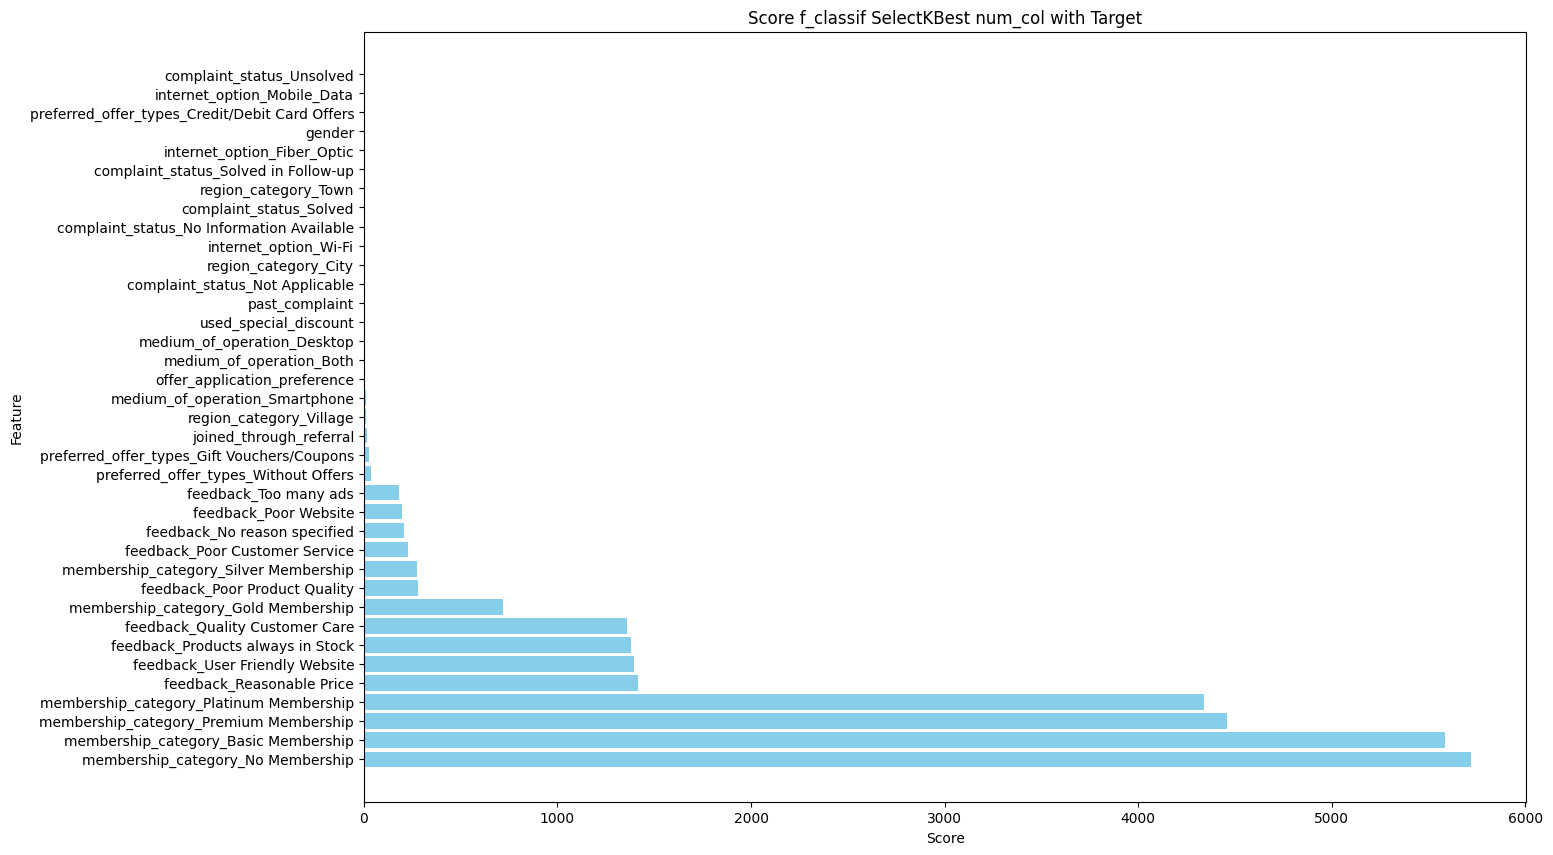

In [114]:
#plot bar hasil perhitungan korelasi
chi_df = chi_df.sort_values(by='Feature_scores', ascending=False)

plt.figure(figsize=(15, 10))
plt.barh(chi_df['Selected_features'], chi_df['Feature_scores'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Score f_classif SelectKBest num_col with Target')
plt.show()

In [115]:
df_fe['churn_risk_score'].shape

(33984,)

In [116]:
df_cat.shape

(33984, 37)

In [117]:
df_cat.columns

Index(['gender', 'joined_through_referral', 'used_special_discount',
       'offer_application_preference', 'past_complaint',
       'region_category_City', 'region_category_Town',
       'region_category_Village', 'membership_category_Basic Membership',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in 

In [118]:
#menggunakan metode pointbiserialr untuk feature selection
correlations = {}
for column in df_cat.columns:
    correlation, p_value = pointbiserialr(df_cat[column], df_fe['churn_risk_score'])
    correlations[column] = correlation

correlation_bis = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
print(correlation_bis)

                                           Feature  Correlation
0                                           gender    -0.003649
1                          joined_through_referral     0.027221
2                            used_special_discount    -0.010056
3                     offer_application_preference    -0.018586
4                                   past_complaint     0.009063
5                             region_category_City     0.006880
6                             region_category_Town     0.006366
7                          region_category_Village    -0.019257
8             membership_category_Basic Membership     0.451225
9              membership_category_Gold Membership    -0.161367
10               membership_category_No Membership     0.456928
11         membership_category_Platinum Membership    -0.382729
12          membership_category_Premium Membership    -0.388569
13           membership_category_Silver Membership    -0.098386
14  preferred_offer_types_Credit/Debit C

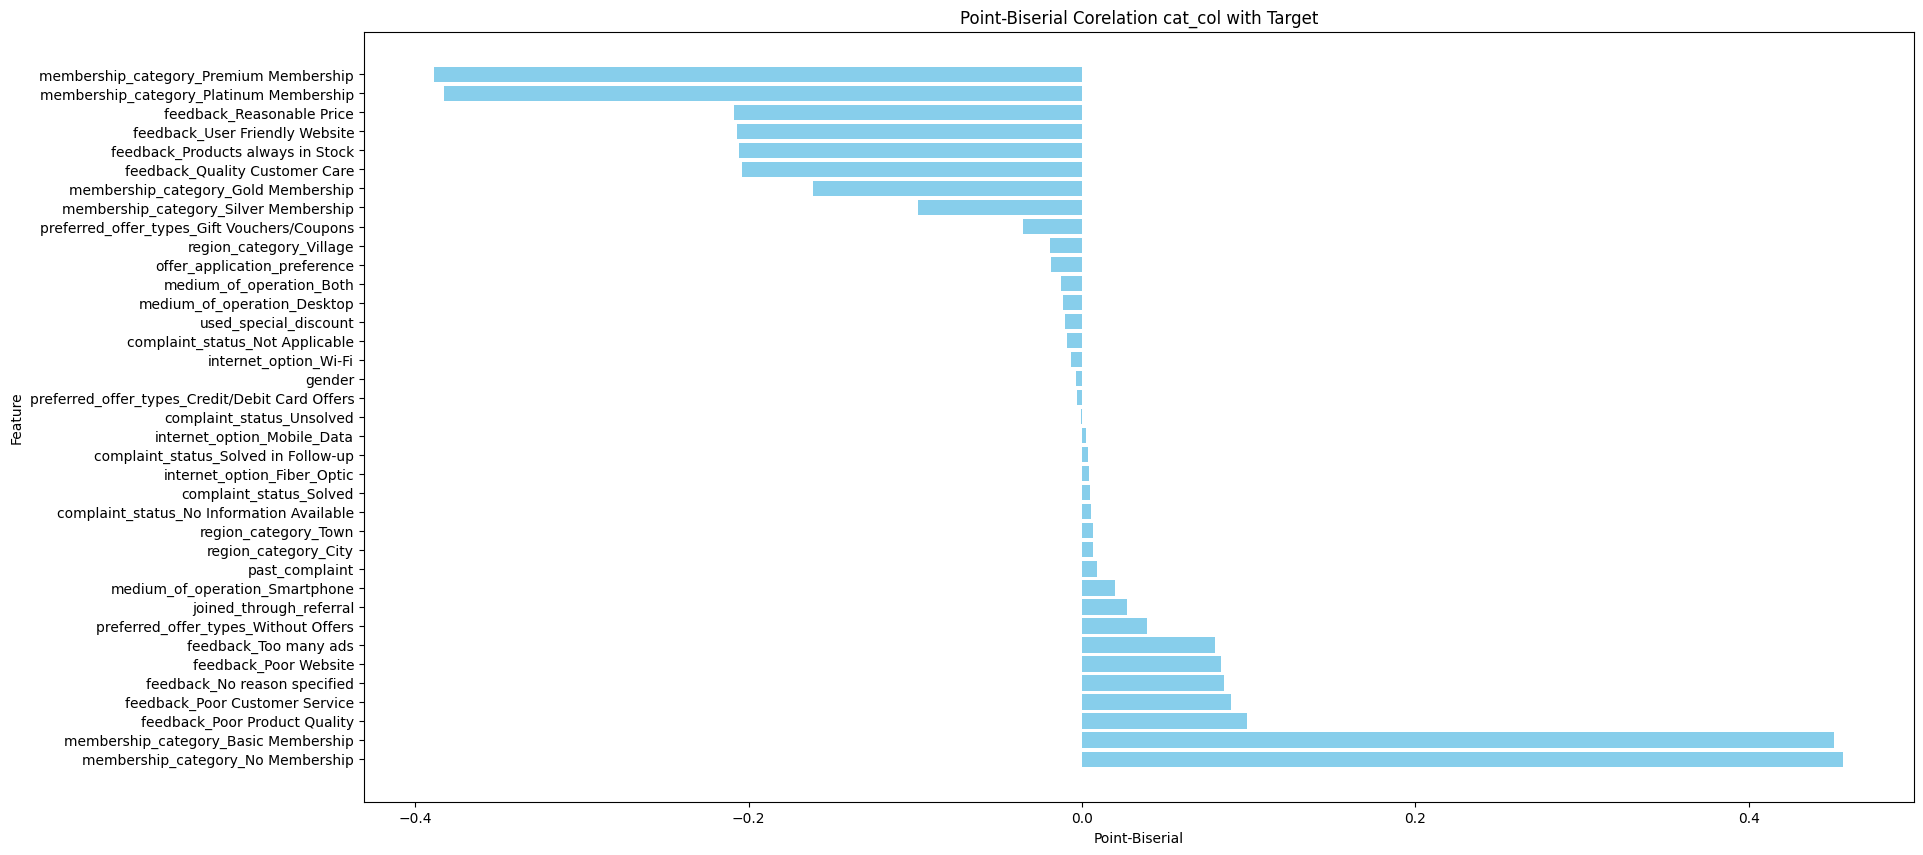

In [119]:
#plot bar hasil perhitungan korelasi
correlation_bis = correlation_bis.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(20, 10))
plt.barh(correlation_bis['Feature'], correlation_bis['Correlation'], color='skyblue')
plt.xlabel('Point-Biserial')
plt.ylabel('Feature')
plt.title('Point-Biserial Corelation cat_col with Target')
plt.show()

In [120]:
#menggunakan metode anova untuk feature selection
anova_p_values = {}
for column in df_cat.columns:
    groups = [df_fe.loc[df_cat[column] == value, 'churn_risk_score'] for value in df_cat[column].unique()]
    f_statistic, p_value = f_oneway(*groups)
    anova_p_values[column] = p_value

anova_f = pd.DataFrame(list(anova_p_values.items()), columns=['Feature', 'p_value'])
print(anova_f)

                                           Feature        p_value
0                                           gender   5.011886e-01
1                          joined_through_referral   5.196200e-07
2                            used_special_discount   6.376153e-02
3                     offer_application_preference   6.116318e-04
4                                   past_complaint   9.476799e-02
5                             region_category_City   2.046712e-01
6                             region_category_Town   2.405654e-01
7                          region_category_Village   3.850497e-04
8             membership_category_Basic Membership   0.000000e+00
9              membership_category_Gold Membership  5.428150e-197
10               membership_category_No Membership   0.000000e+00
11         membership_category_Platinum Membership   0.000000e+00
12          membership_category_Premium Membership   0.000000e+00
13           membership_category_Silver Membership   7.352662e-74
14  prefer

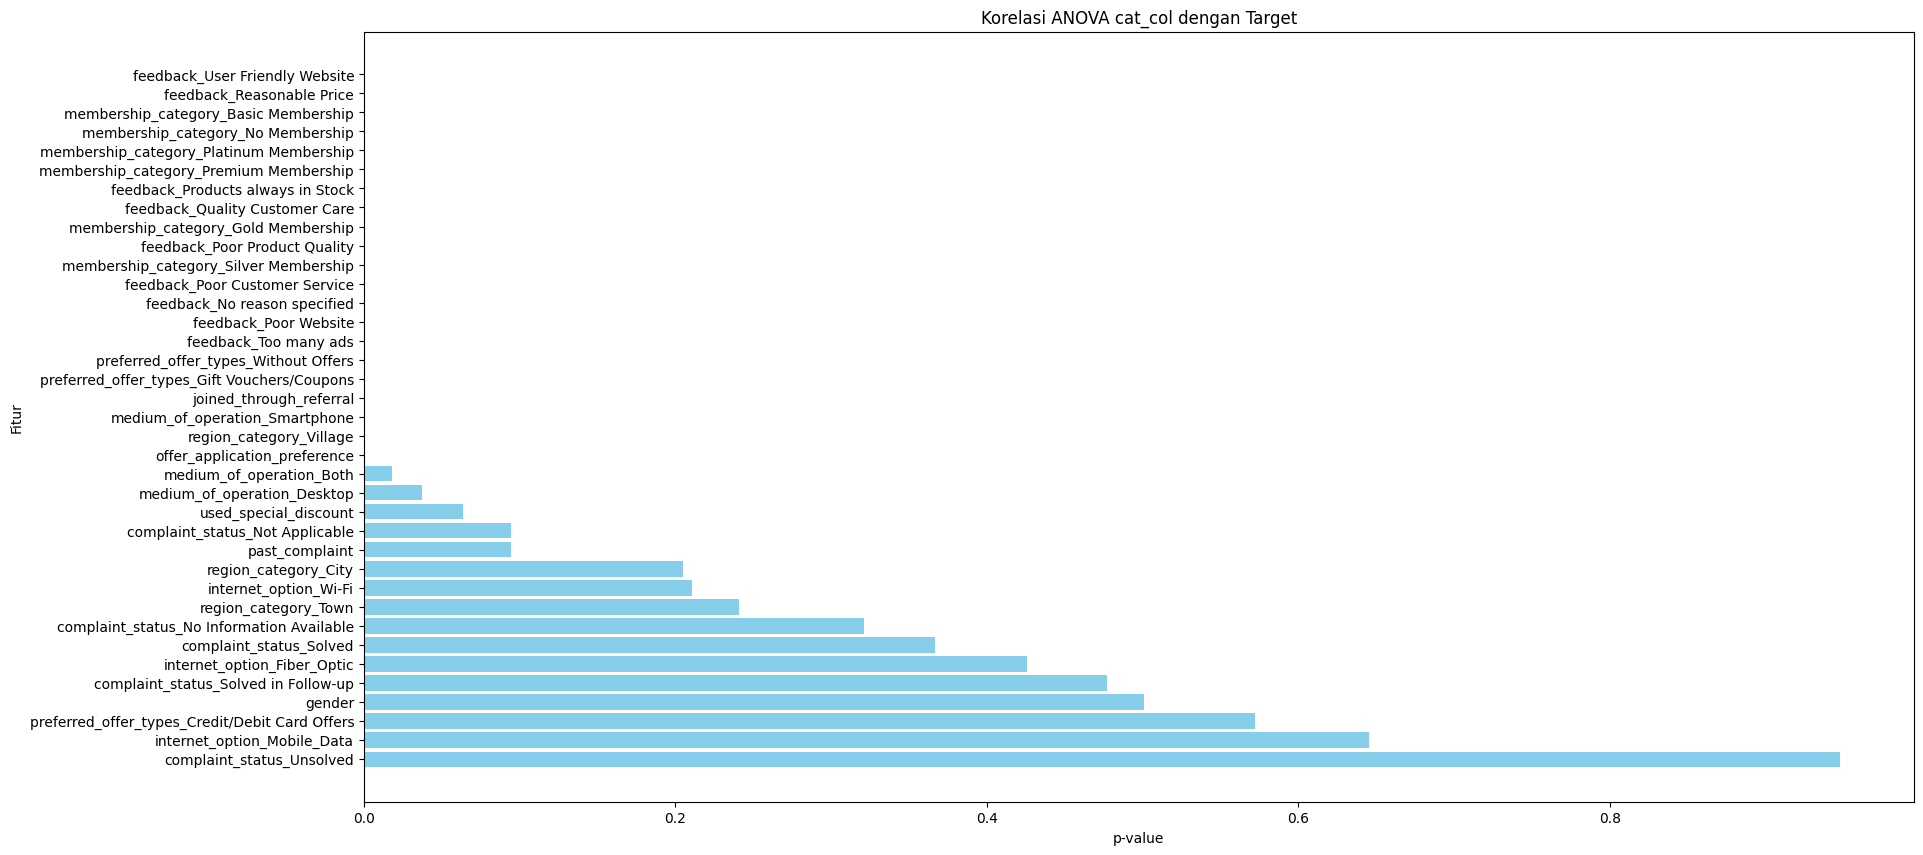

In [121]:
#plot bar hasil perhitungan korelasi
anova_f = anova_f.sort_values(by='p_value', ascending=False)

plt.figure(figsize=(20, 10))
plt.barh(anova_f['Feature'], anova_f['p_value'], color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Fitur')
plt.title('Korelasi ANOVA cat_col dengan Target')
plt.show()

In [122]:
num_col

['age',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [123]:
cat_col

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'hour',
 'minute',
 'second',
 'year',
 'month',
 'date']

Berdasarkan perhitungan kuat pengaruh antar variable numerik dengan target dengan metode Feature Importance Random Forest, Point-biseral, T-test p-value, serta f_classif SelectKBest, dapat disimpulkan bahwa fitur-fitur numerik yang memiliki pengruh kuat dengan target adalah sebagai berikut:

* 'avg_transaction_value',
* 'avg_frequency_login_days',
* 'points_in_wallet

Berdasarkan perhitungan kuat pengaruh antar variable kategorik dengan target dengan metode chi2, Point-biseral, dan ANOVA dapat disimpulkan bahwa fitur-fitur kategorik yang memiliki pengaruh kuat dengan target adalah sebagai berikut:

* 'membership_category',
* 'feedback'

#Preproccess

Pada tahap ini saya membuat fungsi pipeline untuk mengumpulkan alur treatment baik pada numerikal dan categorical, lalu menerapkannya juga pada data test sebelum dilakukan modelling.

In [124]:
gauss

['avg_frequency_login_days', 'age']

In [125]:
iqr

['avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

In [126]:
X_train

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn_status,hour,minute,second,year,month,date
31727,a61a50546d4b4797,38,F,Town,Gold Membership,2017-01-28,Yes,Without Offers,Smartphone,Wi-Fi,...,Yes,Solved in Follow-up,Poor Product Quality,churn,3,3,17,2017,1,28
17717,9d94643eb806f72e,22,F,Town,No Membership,2017-08-25,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,No,Not Applicable,Poor Website,churn,3,24,39,2017,8,25
32702,84900bc08f19698a,31,M,City,Platinum Membership,2017-03-20,No,Credit/Debit Card Offers,Desktop,Mobile_Data,...,No,Not Applicable,No reason specified,not_churn,6,36,47,2017,3,20
837,98a853b231f37a02,34,M,Village,No Membership,2017-08-01,Yes,Without Offers,Smartphone,Fiber_Optic,...,No,Not Applicable,Poor Customer Service,churn,16,22,32,2017,8,1
24474,8b960e11b1074592,16,M,Town,No Membership,2017-03-15,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,No,Not Applicable,Poor Customer Service,churn,15,56,23,2017,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25513,8f1e9b92f828af3e,22,M,City,Gold Membership,2016-09-23,No,Without Offers,Desktop,Wi-Fi,...,Yes,Unsolved,Poor Customer Service,churn,7,15,35,2016,9,23
25949,98e98e91d5dd1361,17,M,Village,Premium Membership,2017-04-29,Yes,Without Offers,Desktop,Mobile_Data,...,Yes,Unsolved,Quality Customer Care,not_churn,17,46,48,2017,4,29
19067,a7c9cb2a57a76003,29,F,Town,No Membership,2016-10-28,Yes,Without Offers,Desktop,Mobile_Data,...,No,Not Applicable,Poor Website,churn,15,29,16,2016,10,28
16296,b8bc78ac842b7751,42,F,Town,Basic Membership,2017-07-14,No,Credit/Debit Card Offers,Desktop,Mobile_Data,...,No,Not Applicable,Poor Website,churn,1,15,2,2017,7,14


In [127]:
#membuat variabel berisi fungsi pipeline untuk numerical feature iqr
num_pipeline_iqr = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3, missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

num_iqr = num_pipeline_iqr.fit_transform(X_train[['avg_transaction_value', 'points_in_wallet' ]])
num_iqr

array([[-0.15888864, -0.30660534],
       [ 0.09528093, -0.08256677],
       [ 0.35251008,  0.20940929],
       ...,
       [-0.54419402, -0.82533525],
       [-0.09184918, -0.30067605],
       [-0.10540683,  0.37227086]])

In [128]:
#membuat variabel berisi fungsi pipeline untuk numerical feature gaussian
num_pipeline_gauss = Pipeline([
        ('outlier_2', Winsorizer(capping_method='gaussian', tail='both', fold=3, missing_values='ignore')),
        ('imputer_2', SimpleImputer(strategy='median')),
        ('scaler_2', MinMaxScaler())
    ])

num_gauss = num_pipeline_gauss.fit_transform(X_train[['avg_frequency_login_days']])
num_gauss

array([[0.16268493],
       [0.627499  ],
       [0.39509197],
       ...,
       [0.        ],
       [0.51129549],
       [0.20916633]])

In [129]:
#membuat variabel berisi fungsi pipeline untuk categorical feature
cat_pipeline = Pipeline([
        ('imputer_3', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['membership_category', 'feedback']])
cat_tr

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [130]:
#membuat variabel berisi fungsi pipeline untuk menyimpan seluruh proses kategorikal dan numerikal dan menggunakannya untuk fit_transform ke X_train
full_pipeline = ColumnTransformer([
        ("num_gauss", num_pipeline_gauss, ['avg_frequency_login_days']),
        ("num_iqr", num_pipeline_iqr, ['avg_transaction_value', 'points_in_wallet']),
        ("cat", cat_pipeline, ['membership_category', 'feedback'])
    ])

X_train_pro = full_pipeline.fit_transform(X_train)
X_train_pro

array([[ 0.16268493, -0.15888864, -0.30660534, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.627499  ,  0.09528093, -0.08256677, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39509197,  0.35251008,  0.20940929, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.54419402, -0.82533525, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51129549, -0.09184918, -0.30067605, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20916633, -0.10540683,  0.37227086, ...,  0.        ,
         1.        ,  0.        ]])

In [131]:
full_pipeline

ColumnTransformer(transformers=[('num_gauss',
                                 Pipeline(steps=[('outlier_2',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both')),
                                                 ('imputer_2',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler_2', MinMaxScaler())]),
                                 ['avg_frequency_login_days']),
                                ('num_iqr',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             missing_values='ignore',
                                                             tail='both')),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['avg_transaction_value', 'points_in_wallet']),
                                ('cat',
                                 Pipeline(steps=[('imputer_3',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe_enc',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False))]),
                                 ['membership_category', 'feedback'])])

In [132]:
#melihat shape dataframe
X_train_pro.shape

(21749, 18)

In [133]:
#menggunakan fungsi full_pipeline untuk X_test
X_test_pro = full_pipeline.transform(X_test)

In [134]:
#menggunakan fungsi full_pipeline untuk X_test
X_val_pro = full_pipeline.transform(X_val)

In [135]:
#melihat shape dataframe
X_test_pro.shape

(6797, 18)

In [136]:
#melihat shape dataframe
X_val_pro.shape

(5438, 18)

Pada tahap ini, saya melakukan preproses berupa pembuatan pipeline yang berisi masing-masing proses treatment baik untuk numerikal feature, dan  dan memasukkanya ke dalam full pipeline berupa keseluruhan treatment pada fitur yang terpilih, lalu menggunakan full pipeline untuk dataset test. Sehingga akhir dari proses ini menghasilkan variabel dataframe X_train_pro yang merupakan hasil fit_transform dengan full_pipeline terhadap dataset X_train, dan X_test_pro yang merupakan hasil transform dengan full_pipeline terhadap dataset X_test

#Modelling Definition & Training

In [137]:
#membuat fungsi untuk melakukan evaluasi model
def evaluate(model):
    y_train_pred = model.predict(X_train_pro)
    y_test_pred = model.predict(X_test_pro)
    y_train_pred = np.where(y_train_pred > 0.5, 1, 0)
    y_test_pred = np.where(y_test_pred > 0.5, 1, 0)

    print("HASIL TRAINING: \n===============================")
    clf_report = (classification_report(y_train, y_train_pred))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"CONFUSION MATRIX :\n")
    sns.set_style("whitegrid", {'axes.grid' : False})
    cm = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print("HASIL TESTING: \n===============================")
    clf_report = (classification_report(y_test, y_test_pred))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"CONFUSION MATRIX :\n")
    sns.set_style("whitegrid", {'axes.grid' : False})
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

##TensorFlow Pipeline

In [138]:

# pipeline ETL tensorflow
train_set = tf.data.Dataset.from_tensor_slices((X_train_pro, y_train))

## Shuffle and slice train dataset.
train_set = train_set.shuffle(buffer_size=712).batch(64)

## Now we get a test dataset.
val_set = tf.data.Dataset.from_tensor_slices((X_val_pro, y_val))
val_set = val_set.batch(64)

Pada section ini X_train_pro disiapkan dalam bentuk dataset yang telah diacak dan diambil dalam batch, sedangkan X_val_pro disiapkan dalam bentuk dataset yang diambil dalam batch. Dengan membuat data dalam format ini, melatih dan menguji model deep learning dengan efisien menggunakan tensorflow.

In [139]:
X_train_pro.shape

(21749, 18)

In [140]:
train_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 18), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

##Sequential

In [141]:
#membuat arsitektur model sequential
model_s = tf.keras.Sequential([

    layers.Dense(units=18, activation='relu', input_dim=X_train_pro.shape[1]),

    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),


    layers.Dense(units=1, activation='sigmoid')
])


model_s.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 128)               2432      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,095
Trainable params: 11,095
Non-trainable params: 0
_________________________________________________________________


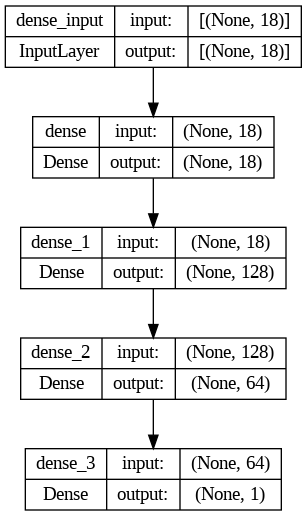

In [142]:
tf.keras.utils.plot_model(model_s, show_shapes=True)

In [143]:
history = model_s.fit(train_set, epochs=100, validation_data=val_set)

Epoch 1/100
340/340 [==============================] - 5s 5ms/step - loss: 0.2851 - accuracy: 0.8856 - val_loss: 0.1957 - val_accuracy: 0.9233
Epoch 2/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1922 - accuracy: 0.9227 - val_loss: 0.1817 - val_accuracy: 0.9266
Epoch 3/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1793 - accuracy: 0.9253 - val_loss: 0.1768 - val_accuracy: 0.9268
Epoch 4/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1749 - accuracy: 0.9220 - val_loss: 0.1620 - val_accuracy: 0.9268
Epoch 5/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1697 - accuracy: 0.9236 - val_loss: 0.1606 - val_accuracy: 0.9257
Epoch 6/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9242 - val_loss: 0.1567 - val_accuracy: 0.9274
Epoch 7/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1664 - accuracy: 0.9258 - val_loss: 0.1576 - val_accuracy: 0.9287

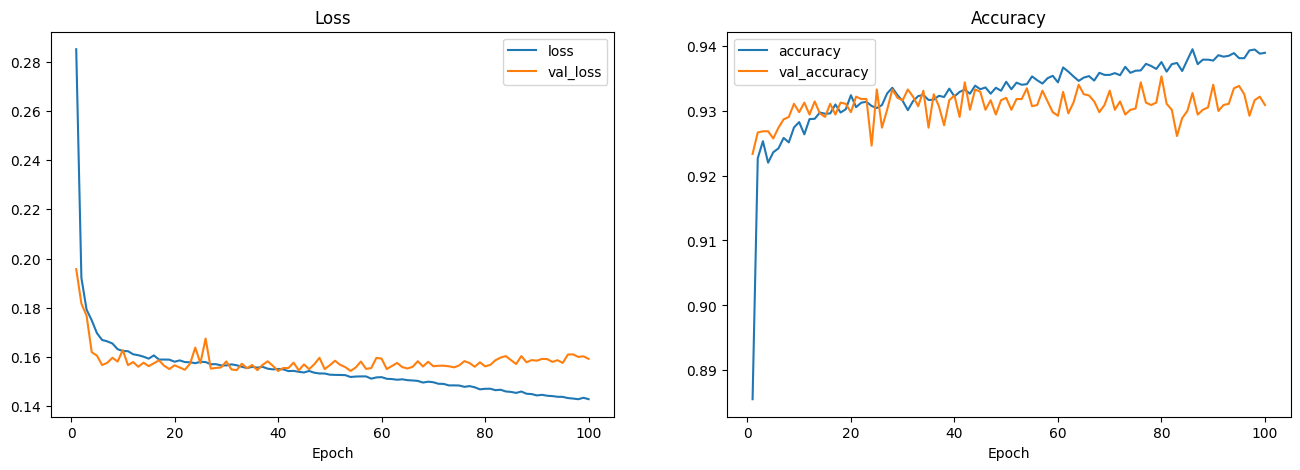

In [144]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

213/213 [==============================] - 0s 1ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     10875
           1       0.93      0.95      0.94     10874

    accuracy                           0.94     21749
   macro avg       0.94      0.94      0.94     21749
weighted avg       0.94      0.94      0.94     21749

CONFUSION MATRIX :



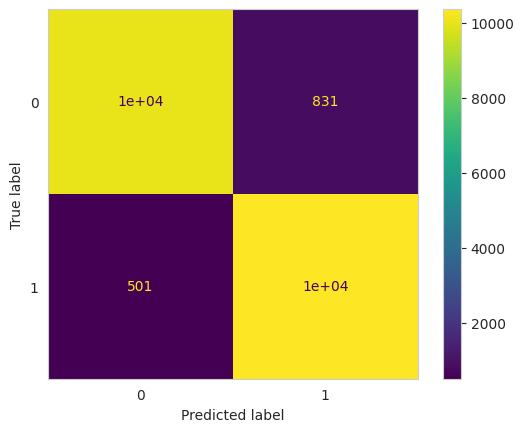

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3398
           1       0.91      0.95      0.93      3399

    accuracy                           0.93      6797
   macro avg       0.93      0.93      0.93      6797
weighted avg       0.93      0.93      0.93      6797

CONFUSION MATRIX :



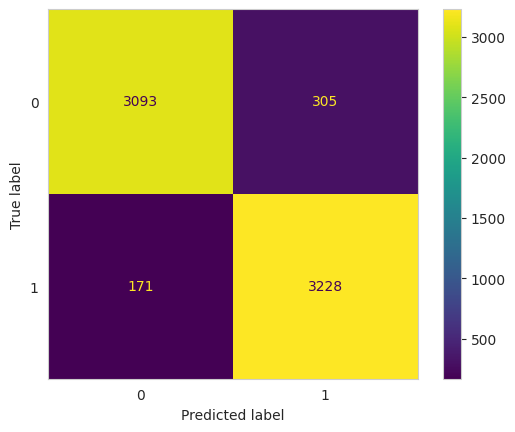

In [145]:
evaluate(model_s)

###Tuning

In [146]:
#membuat fungsi model dan melakukan hyperparameter tuning dengan GridSearchCV
def build_model(units_input=18, units_hidden_1=128, units_hidden_2=64, dropout_rate=0.0):
    model = tf.keras.Sequential()
    model.add(layers.Dense(units=units_input, activation='relu', input_dim=X_train_pro.shape[1]))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(units=units_hidden_1, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(units=units_hidden_2, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=build_model, verbose=0)


param_grid = {
    'units_input': [32, 48],
    'units_hidden_1': [64, 192],
    'units_hidden_2': [32, 96],
    'dropout_rate': [0.0, 0.2, 0.3]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)


In [147]:
#Konversi dataset TensorFlow menjadi array numpy
X_train_array = next(iter(train_set))[0].numpy()
y_train_array = next(iter(train_set))[1].numpy()
X_val_array = next(iter(val_set))[0].numpy()
y_val_array = next(iter(val_set))[1].numpy()

grid_result = grid_search.fit(X_train_array, y_train_array, epochs=100, validation_data=(X_val_array, y_val_array))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [148]:
#Menampilkan hasil hyperparameter tuning
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.546898 using {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 96, 'units_input': 32}
0.453102 (0.019467) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 32, 'units_input': 32}
0.515152 (0.028932) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 32, 'units_input': 48}
0.546898 (0.019467) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 96, 'units_input': 32}
0.532468 (0.055099) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 96, 'units_input': 48}
0.454545 (0.067158) with: {'dropout_rate': 0.0, 'units_hidden_1': 192, 'units_hidden_2': 32, 'units_input': 32}
0.515152 (0.028932) with: {'dropout_rate': 0.0, 'units_hidden_1': 192, 'units_hidden_2': 32, 'units_input': 48}
0.484848 (0.028932) with: {'dropout_rate': 0.0, 'units_hidden_1': 192, 'units_hidden_2': 96, 'units_input': 32}
0.481962 (0.123779) with: {'dropout_rate': 0.0, 'units_hidden_1': 192, 'units_hidden_2': 96, 'units_input': 48}
0.

In [149]:
grid_result.best_params_

{'dropout_rate': 0.0,
 'units_hidden_1': 64,
 'units_hidden_2': 96,
 'units_input': 32}

In [150]:
#membuat model dengan parameter hasil tuning
model_best = tf.keras.Sequential([

    layers.Dense(units=32, activation='relu', input_dim=X_train_pro.shape[1]),
    layers.Dropout(0.2),

    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(units=1, activation='sigmoid')
])


model_best.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model_best.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_296 (Dense)           (None, 32)                608       
                                                                 
 dropout_219 (Dropout)       (None, 32)                0         
                                                                 
 dense_297 (Dense)           (None, 64)                2112      
                                                                 
 dropout_220 (Dropout)       (None, 64)                0         
                                                                 
 dense_298 (Dense)           (None, 32)                2080      
                                                                 
 dropout_221 (Dropout)       (None, 32)                0         
                                                                 
 dense_299 (Dense)           (None, 1)               

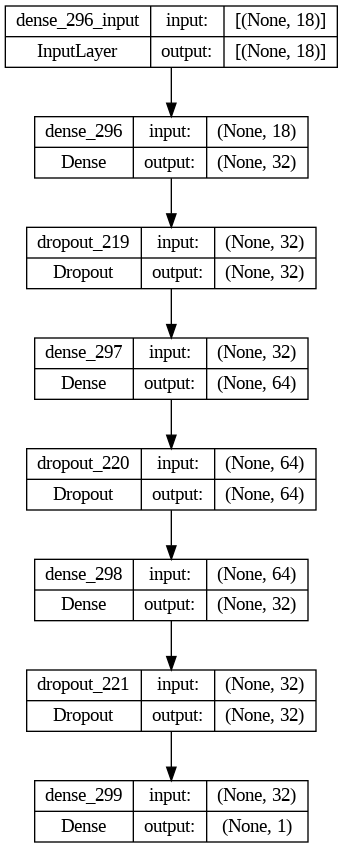

In [151]:
tf.keras.utils.plot_model(model_best, show_shapes=True)

In [152]:
history = model_best.fit(train_set, epochs=100, validation_data=val_set)

Epoch 1/100
340/340 [==============================] - 3s 5ms/step - loss: 0.3548 - accuracy: 0.8341 - val_loss: 0.2328 - val_accuracy: 0.8985
Epoch 2/100
340/340 [==============================] - 1s 4ms/step - loss: 0.2530 - accuracy: 0.8932 - val_loss: 0.1955 - val_accuracy: 0.9281
Epoch 3/100
340/340 [==============================] - 1s 4ms/step - loss: 0.2140 - accuracy: 0.9154 - val_loss: 0.1754 - val_accuracy: 0.9261
Epoch 4/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1990 - accuracy: 0.9198 - val_loss: 0.1673 - val_accuracy: 0.9252
Epoch 5/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1901 - accuracy: 0.9232 - val_loss: 0.1641 - val_accuracy: 0.9275
Epoch 6/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1825 - accuracy: 0.9232 - val_loss: 0.1634 - val_accuracy: 0.9259
Epoch 7/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1852 - accuracy: 0.9233 - val_loss: 0.1599 - val_accuracy: 0.9270

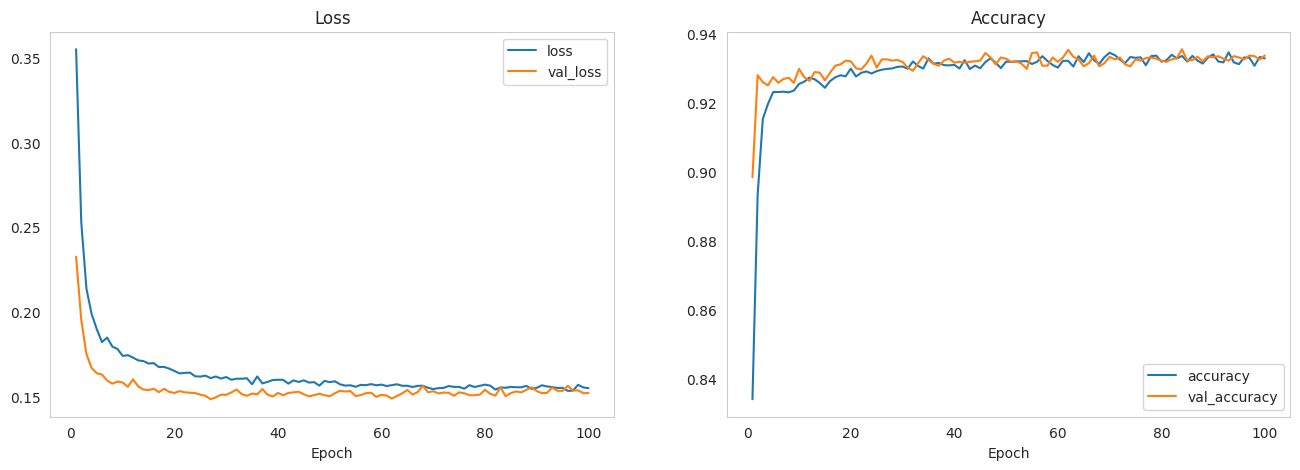

In [153]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

213/213 [==============================] - 0s 2ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10875
           1       0.92      0.95      0.94     10874

    accuracy                           0.94     21749
   macro avg       0.94      0.94      0.94     21749
weighted avg       0.94      0.94      0.94     21749

CONFUSION MATRIX :



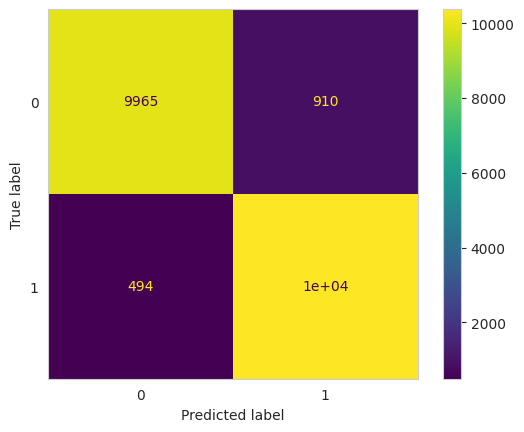

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3398
           1       0.91      0.95      0.93      3399

    accuracy                           0.93      6797
   macro avg       0.93      0.93      0.93      6797
weighted avg       0.93      0.93      0.93      6797

CONFUSION MATRIX :



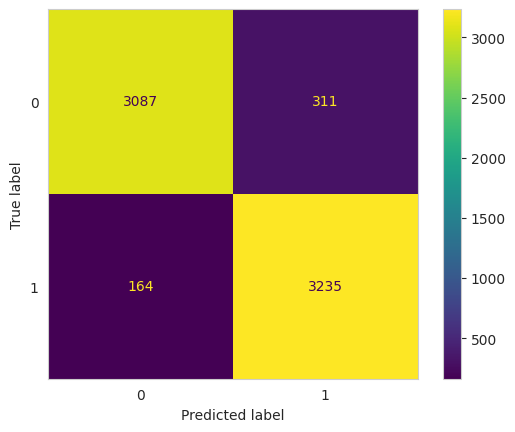

In [154]:
evaluate(model_best)

##Functional

In [155]:


#membuat fungsi model Functional ANN
def create_functional_ann(units_input=18, units_hidden_1=128, units_hidden_2=64):

    inputs = tf.keras.Input(shape=(units_input,))


    hidden_1 = layers.Dense(units_hidden_1, activation='relu')(inputs)
    hidden_2 = layers.Dense(units_hidden_2, activation='relu')(hidden_1)


    outputs = layers.Dense(units=1, activation='sigmoid')(hidden_2)


    model_f = tf.keras.Model(inputs=inputs, outputs=outputs)


    model_f.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model_f


model_f = create_functional_ann()
model_f.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_300 (Dense)           (None, 128)               2432      
                                                                 
 dense_301 (Dense)           (None, 64)                8256      
                                                                 
 dense_302 (Dense)           (None, 1)                 65        
                                                                 
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


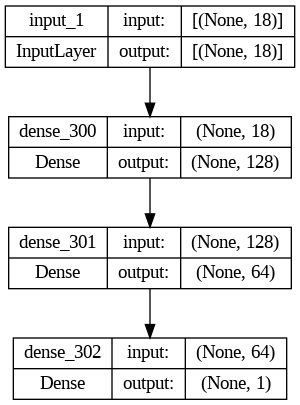

In [156]:
tf.keras.utils.plot_model(model_f, show_shapes=True)

In [157]:
history = model_f.fit(train_set, epochs=100, validation_data=val_set)

Epoch 1/100
340/340 [==============================] - 3s 5ms/step - loss: 0.2806 - accuracy: 0.8845 - val_loss: 0.2076 - val_accuracy: 0.9202
Epoch 2/100
340/340 [==============================] - 2s 5ms/step - loss: 0.2021 - accuracy: 0.9218 - val_loss: 0.1807 - val_accuracy: 0.9283
Epoch 3/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1825 - accuracy: 0.9255 - val_loss: 0.1791 - val_accuracy: 0.9204
Epoch 4/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1771 - accuracy: 0.9241 - val_loss: 0.1673 - val_accuracy: 0.9307
Epoch 5/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1722 - accuracy: 0.9243 - val_loss: 0.1673 - val_accuracy: 0.9222
Epoch 6/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1694 - accuracy: 0.9257 - val_loss: 0.1686 - val_accuracy: 0.9253
Epoch 7/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1685 - accuracy: 0.9262 - val_loss: 0.1630 - val_accuracy: 0.9257

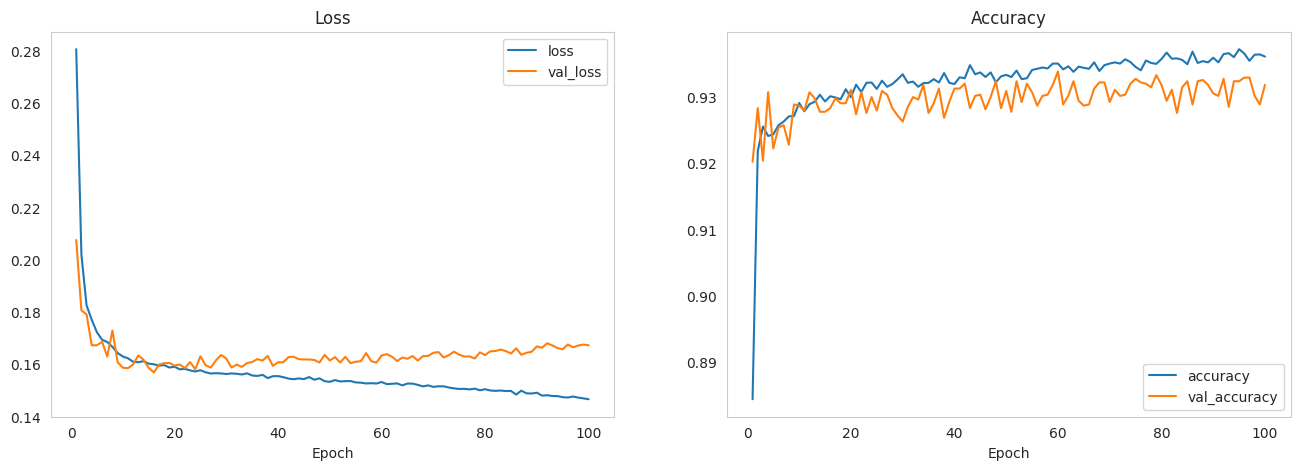

In [158]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

213/213 [==============================] - 0s 1ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10875
           1       0.93      0.94      0.94     10874

    accuracy                           0.94     21749
   macro avg       0.94      0.94      0.94     21749
weighted avg       0.94      0.94      0.94     21749

CONFUSION MATRIX :



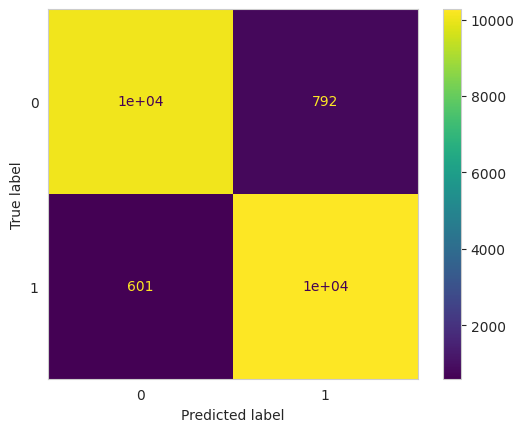

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3398
           1       0.92      0.94      0.93      3399

    accuracy                           0.93      6797
   macro avg       0.93      0.93      0.93      6797
weighted avg       0.93      0.93      0.93      6797

CONFUSION MATRIX :



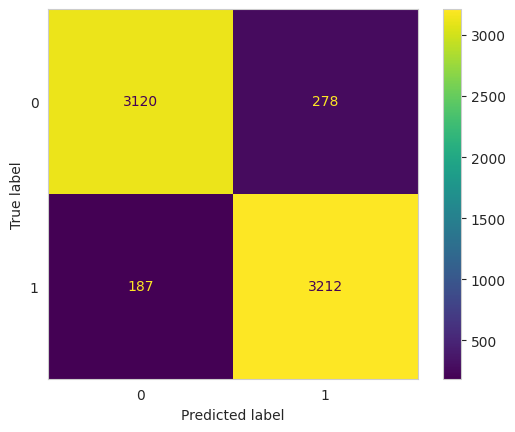

In [159]:
evaluate(model_f)

###Tuning

In [160]:
#membuat fungsi model dan melakukan hyperparameter tuning dengan GridSearchCV
def create_functional_ann(units_input=18, units_hidden_1=128, units_hidden_2=64, dropout_rate=0.0):
    inputs = tf.keras.Input(shape=(units_input,))
    x = layers.Dense(units_hidden_1, activation='relu')(inputs)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(units_hidden_2, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(units=1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#wrap model ke dalam KerasClassifier untuk digunakan dengan GridSearchCV
model = KerasClassifier(build_fn=create_functional_ann, verbose=0)


param_grid = {
    'units_input': [18],     # Jumlah unit di layer input
    'units_hidden_1': [64, 128, 192],  # Jumlah unit di layer tersembunyi pertama
    'units_hidden_2': [32, 64, 96],   # Jumlah unit di layer tersembunyi kedua
    'dropout_rate': [0.0, 0.2, 0.3],  # Tingkat dropout
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)



In [161]:
#konversi dataset TensorFlow menjadi array numpy
X_train_array = next(iter(train_set))[0].numpy()
y_train_array = next(iter(train_set))[1].numpy()
X_val_array = next(iter(val_set))[0].numpy()
y_val_array = next(iter(val_set))[1].numpy()

grid_result = grid_search.fit(X_train_array, y_train_array, epochs=100, validation_data=(X_val_array, y_val_array))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [162]:
#menampilkan hasil hyperparameter tuning
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.672439 using {'dropout_rate': 0.3, 'units_hidden_1': 64, 'units_hidden_2': 64, 'units_input': 18}
0.577922 (0.039951) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 32, 'units_input': 18}
0.657287 (0.050803) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 64, 'units_input': 18}
0.610390 (0.049862) with: {'dropout_rate': 0.0, 'units_hidden_1': 64, 'units_hidden_2': 96, 'units_input': 18}
0.658009 (0.079588) with: {'dropout_rate': 0.0, 'units_hidden_1': 128, 'units_hidden_2': 32, 'units_input': 18}
0.625541 (0.031267) with: {'dropout_rate': 0.0, 'units_hidden_1': 128, 'units_hidden_2': 64, 'units_input': 18}
0.641414 (0.052793) with: {'dropout_rate': 0.0, 'units_hidden_1': 128, 'units_hidden_2': 96, 'units_input': 18}
0.609668 (0.041081) with: {'dropout_rate': 0.0, 'units_hidden_1': 192, 'units_hidden_2': 32, 'units_input': 18}
0.641414 (0.035712) with: {'dropout_rate': 0.0, 'units_hidden_1': 192, 'units_hidden_2': 64, 'units_input': 18}
0

In [163]:
grid_result.best_params_

{'dropout_rate': 0.3,
 'units_hidden_1': 64,
 'units_hidden_2': 64,
 'units_input': 18}

In [164]:
inputs = tf.keras.Input(shape=(18,))
x = layers.Dense(192, activation='relu')(inputs)
x = layers.Dropout(0.0)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.0)(x)
outputs = layers.Dense(units=1, activation='sigmoid')(x)
model_f_best = tf.keras.Model(inputs=inputs, outputs=outputs)
model_f_best.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
model_f_best.summary()

Model: "model_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_84 (InputLayer)       [(None, 18)]              0         
                                                                 
 dense_549 (Dense)           (None, 192)               3648      
                                                                 
 dropout_386 (Dropout)       (None, 192)               0         
                                                                 
 dense_550 (Dense)           (None, 32)                6176      
                                                                 
 dropout_387 (Dropout)       (None, 32)                0         
                                                                 
 dense_551 (Dense)           (None, 1)                 33        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable 

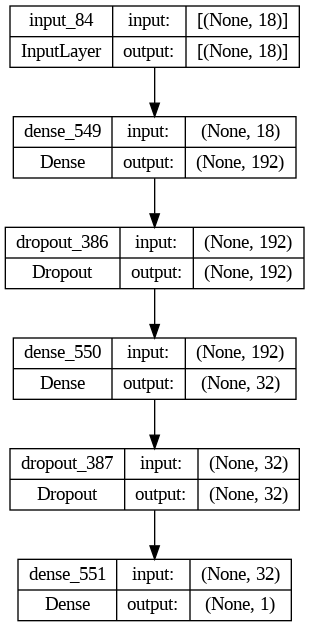

In [166]:
tf.keras.utils.plot_model(model_f_best, show_shapes=True)

In [167]:
history = model_f_best.fit(train_set, epochs=100, validation_data=val_set)

Epoch 1/100
340/340 [==============================] - 3s 5ms/step - loss: 0.2966 - accuracy: 0.8752 - val_loss: 0.2107 - val_accuracy: 0.9224
Epoch 2/100
340/340 [==============================] - 1s 4ms/step - loss: 0.2053 - accuracy: 0.9222 - val_loss: 0.1908 - val_accuracy: 0.9237
Epoch 3/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1881 - accuracy: 0.9240 - val_loss: 0.1751 - val_accuracy: 0.9320
Epoch 4/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1824 - accuracy: 0.9244 - val_loss: 0.1794 - val_accuracy: 0.9198
Epoch 5/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1758 - accuracy: 0.9245 - val_loss: 0.1743 - val_accuracy: 0.9290
Epoch 6/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1740 - accuracy: 0.9245 - val_loss: 0.1668 - val_accuracy: 0.9253
Epoch 7/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1701 - accuracy: 0.9256 - val_loss: 0.1634 - val_accuracy: 0.9294

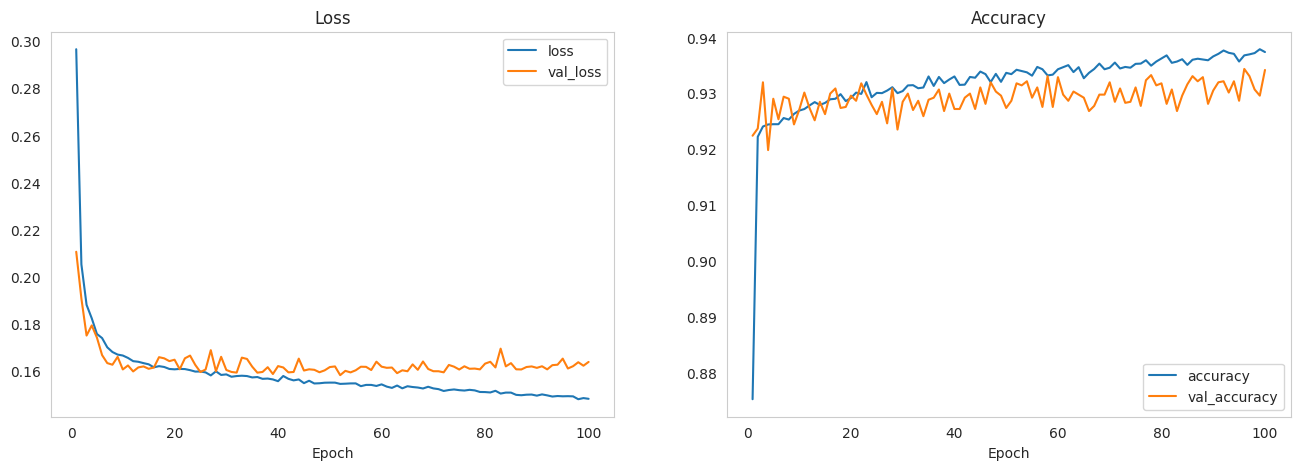

In [168]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

213/213 [==============================] - 0s 2ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10875
           1       0.95      0.93      0.94     10874

    accuracy                           0.94     21749
   macro avg       0.94      0.94      0.94     21749
weighted avg       0.94      0.94      0.94     21749

CONFUSION MATRIX :



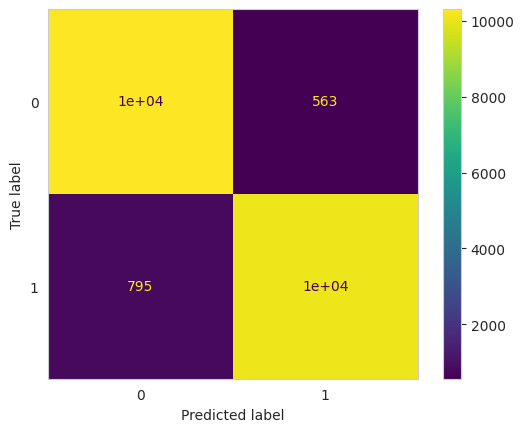

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3398
           1       0.94      0.93      0.93      3399

    accuracy                           0.93      6797
   macro avg       0.93      0.93      0.93      6797
weighted avg       0.93      0.93      0.93      6797

CONFUSION MATRIX :



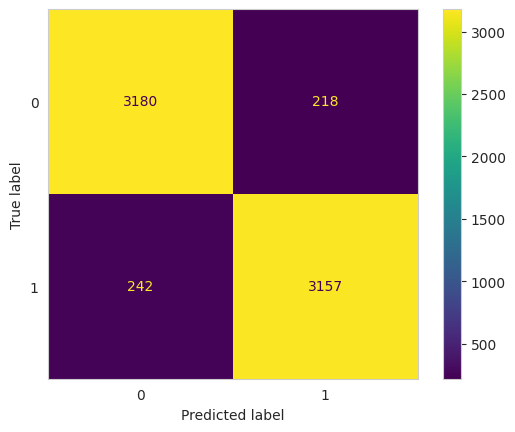

In [169]:
evaluate(model_f_best)

Selected model: model_best (hasil tuning model sequential)


In [170]:
test_result = model_best.evaluate(X_test_pro, y_test, verbose=1)
print(f'Test loss: {test_result[0]:.4f}')
print(f'Test Accuracy: {test_result[1]:.4f}')

213/213 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.9301
Test loss: 0.1649
Test Accuracy: 0.9301


#Model Evaluation



---


Pada section model training di atas, saya melakukan latihan model dan melakukan penilaian terhadap nilai loss dan accuracy dari data train dan validasi. Selain itu, mengacu pada hasil training model sebelumnya, saya juga memperoleh clasification report, yang memberikan nilai precision, recall, f1-score, dan accuracy, dan confusion matrix yang memuat informasi mengenai berapa nilai true positive, true negative, false positive, dan false negative. Clasification report dan confusion matrix ini akan menjadi alat saya untuk mengevaluasi model-model yang saya uji pada penelitian ini. Berikut adalah penjelasan terkait kedua alat evaluasi tersebut:

Clasification report dan confusion matrix adalah dua alat evaluasi yang sangat penting untuk mengevaluasi performa model pada tugas klasifikasi (classification) dalam penelitian ini.

1. **Classification Report**:
Classification report menyajikan metrik evaluasi seperti precision, recall, f1-score, dan support untuk setiap kelas pada data target. Berikut adalah penjelasan singkat tentang masing-masing metrik:

  - **Precision**: Precision (presisi) adalah rasio dari true positive (TP) dengan total prediksi positif (TP + false positive, FP). Metrik ini mengukur seberapa akurat model dalam mengklasifikasikan data positif. Precision tinggi menunjukkan bahwa ketika model memprediksi suatu kelas sebagai positif, kemungkinan benar juga sangat tinggi.

  - **Recall**: Recall (recall atau sensitivity) adalah rasio dari true positive (TP) dengan total data yang benar positif (TP + false negative, FN). Metrik ini mengukur seberapa baik model dalam menemukan kembali data positif yang sebenarnya. Recall tinggi menunjukkan bahwa model mampu mendeteksi sebagian besar data positif.

  - **F1-Score**: F1-score (F1-skor) adalah harmonisasi dari precision dan recall. Metrik ini memberikan keseimbangan antara precision dan recall, sehingga berguna saat terjadi ketidakseimbangan kelas. F1-score tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara kemampuan mengklasifikasikan data positif secara akurat dan menemukan kembali data positif yang sebenarnya.

2. **Confusion Matrix**:
Confusion matrix adalah tabel yang menyajikan jumlah prediksi yang benar dan yang salah dari model klasifikasi pada setiap kelas target. Sebelum menggunakannya terlebih dahulu harus didefinisikan nilai apa yang positive, di mana pada kasus ini saya mendefinisikan **nilai 1 (churn) sebagai nilai positive**. Berikut adalah penjelasan mengenai isi empat nilai dari tabel ini:

  - **True Positive (TP)**: Jumlah **churn** yang diprediksi benar oleh model.
  - **True Negative (TN)**: Jumlah **not churn** yang diprediksi benar oleh model.
  - **False Positive (FP)**: Jumlah **not churn**  yang salah diprediksi sebagai **churn** oleh model.
  - **False Negative (FN)**: Jumlah **churn** yang salah diprediksi sebagai **not churn** oleh model.

Dari confusion matrix ini juga saya dapat menghitung metrik evaluasi lain seperti precision, recall, dan accuracy yang telah dijelaskan sebelumnya.



---

**Evaluation**

Pada dataset di atas, terlihat bahwa pada sequential sebelum tuning memiliki model yang cenderung overfit, hal ini dikarenakan pada plot hasil loss dan accuracy dari dataset train dan validation, ditemukan bahwa pada dataset train nilai loss dan accuracy lebih baik daripada di dataset validation. Hal ini juga terjadi pada model functional, di mana dihasilkan model yang overfitting sebelum dituning.

Setelah melakukan hyperparameter tuning dengan bantuan GridSearchCV, diperoleh hasil parameter terbaik untuk sequential adalah :{'dropout_rate': 0.0,
 'units_hidden_1': 64,
 'units_hidden_2': 96,
 'units_input': 32}
 dan untuk functional adalah:
{'dropout_rate': 0.3,
 'units_hidden_1': 64,
 'units_hidden_2': 64,
 'units_input': 18}

Untuk melakukan evaluasi model ini, saya menggunakan hasil dari model yang sudah dilakukan **hyperparameter tuning**, di mana saya fokus pada nilai **acccuracy**  model, yang merupakan penilaian mengenai seberapa sedikit SEMUA nilai FALSE yang dihasilkan oleh model. Berikut adalah hasil evaluasi untuk setiap model saya:

Sequential (Parameter 'dropout_rate': 0.0, 'units_hidden_1': 64 'units_hidden_2': 96, 'units_input': 32)
* Nilai accuracy 0.94 di training, dan 0.93 di validate
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi 3235 true positive, 311 false positive, 3097 true negative, 164 false negative

Functional (Parameter 'dropout_rate': 0.3, 'units_hidden_1': 64 'units_hidden_2': 64, 'units_input': 18)
* Nilai accuracy 0.94 di training, dan 0.93 di validate
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi 3157 true positive, 218 false positive, 3180 true negative, 242 false negative


Pada training ini juga saya menemukan bahwa model functional dengan best parameter juga masih mengalami overfitting. Hal ini dapat terjadi karena model masih cenderung menghafal pada saat latihan dan tidak dapat menggeneralisasi dengan baik di parameter yang saya coba. Pada model ini dapat diimprove dengan mengganti nilai dropout atau menambahkan nilai batch yang lain

#Model Saving

In [171]:
#membuat pipeline yang berisi seluruh treatment data sampai modelling
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("ann_seq", model_best)
])

all_process.fit(X_train, y_train)


680/680 [==============================] - 3s 4ms/step - loss: 0.1562 - accuracy: 0.9329


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_gauss',
                                                  Pipeline(steps=[('outlier_2',
                                                                   Winsorizer(missing_values='ignore',
                                                                              tail='both')),
                                                                  ('imputer_2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler_2',
                                                                   MinMaxScaler())]),
                                                  ['avg_frequency_login_days']),
                                                 ('num_iqr',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              missing_values='igno...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['avg_transaction_value',
                                                   'points_in_wallet']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_3',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_enc',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['membership_category',
                                                   'feedback'])])),
                ('ann_seq',
                 <keras.engine.sequential.Sequential object at 0x7e1fe03e8430>)])

In [172]:
#menyimpan model
pickle.dump(all_process, open('churn_ann_pred.pkl', 'wb'))

In [173]:
data_inf.to_csv('data_inf.csv', index=False)

#Model Inference

Section ini adalah simulasi menggunakan model yang tersimpan dengan dataset baru, hal ini saya lakukan di notebook ke 2 tugas ini

#Kesimpulan, Kelemahan & Kelebihan, dan Pengembangan

**Kesimpulan:**

Berdasarkan hasil evaluasi model yang telah dilakukan, kami dapat menyimpulkan bahwa kedua model (Sequential dan Functional ANN) telah mengalami peningkatan performa setelah melalui proses hyperparameter tuning menggunakan GridSearchCV. Model yang telah dituning menunjukkan tingkat akurasi yang baik, dengan nilai accuracy sekitar 93% pada data validasi maupun data uji. Namun, perlu diperhatikan bahwa model functional masih cenderung mengalami overfitting, sehingga diperlukan beberapa penyesuaian lebih lanjut untuk meningkatkan generalisasi pada data uji.

**Saran Bisnis:**

Jika model ini akan digunakan oleh perusahaan e-commerce, berikut adalah beberapa saran bisnis yang dapat diambil dari hasil pengembangan model ini:

1. **Prediksi Churn Pelanggan**: Model yang telah dikembangkan dapat digunakan untuk memprediksi potensi churn (pergantian) pelanggan. Perusahaan e-commerce dapat memanfaatkan prediksi ini untuk mengidentifikasi pelanggan yang berisiko tinggi untuk beralih ke pesaing atau tidak lagi menggunakan layanan mereka. Dengan demikian, perusahaan dapat mengambil tindakan pencegahan yang sesuai, seperti memberikan tawaran khusus atau insentif, untuk mempertahankan pelanggan yang berisiko churn.

2. **Segmentasi Pelanggan**: Berdasarkan hasil prediksi dari model, perusahaan dapat melakukan segmentasi pelanggan berdasarkan potensi churn. Hal ini memungkinkan perusahaan untuk menyusun strategi pemasaran yang lebih efektif dan spesifik untuk setiap kelompok pelanggan. Pelanggan yang diidentifikasi berisiko churn dapat diberikan perhatian khusus untuk meningkatkan retensi dan loyalitas mereka.

3. **Personalisasi Layanan**: Model ini juga dapat digunakan untuk menyajikan layanan yang lebih personalisasi kepada setiap pelanggan. Dengan memahami perilaku dan preferensi pelanggan, perusahaan dapat menawarkan produk, promosi, atau rekomendasi yang lebih sesuai dengan kebutuhan dan keinginan masing-masing pelanggan. Personalisasi layanan ini dapat meningkatkan kepuasan pelanggan dan membangun loyalitas yang lebih kuat.

4. **Optimasi Penawaran dan Promosi**: Model dapat membantu perusahaan e-commerce dalam mengoptimalkan penawaran dan promosi yang ditampilkan kepada pelanggan. Dengan memahami preferensi dan respons pelanggan terhadap penawaran tertentu, perusahaan dapat menyesuaikan strategi pemasaran dan promosi untuk meningkatkan efektivitas kampanye dan meningkatkan tingkat konversi.

5. **Peningkatan Efisiensi Operasional**: Dengan memanfaatkan prediksi dari model ini, perusahaan dapat lebih fokus dalam mengalokasikan sumber daya dan upaya untuk menghadapi pelanggan yang berisiko tinggi churn. Hal ini dapat membantu perusahaan dalam mengoptimalkan pengelolaan sumber daya dan operasional secara keseluruhan.


**Pengembangan Model**:

Berikut adalah hal-hal yang dapat membantu untuk pengembangan model pada kasus ini
* Feature Engineering: melakukan eksplorasi lebih lanjut pada fitur-fitur yang ada untuk mengekstrak informasi tambahan yang relevan dan membantu meningkatkan performa model.
* Penyusunan ulang Hyperparameter: melakukan eksplorasi lebih lanjut pada kombinasi hyperparameter untuk mencari konfigurasi yang lebih baik untuk setiap model.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.